# Exercise

 - Import data on emotion
 - Train a CNN to classify by emotion (Angry, Disgust, Fear, Happy...)
 - Use Data augmentaion techinques to improve you accuracy
 - Compare your results with DeepFace Library https://pypi.org/project/deepface/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tabulate import tabulate

import cv2 as cv
import pathlib
from PIL import Image

from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.metrics import Recall, Precision
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip "drive/MyDrive/Ironhack/Data/emotions-20231106T112602Z-001.zip" -d "drive/MyDrive/Ironhack/Data/emotions"

Archive:  drive/MyDrive/Ironhack/Data/emotions-20231106T112602Z-001.zip
replace drive/MyDrive/Ironhack/Data/emotions/emotions/Surprise/image 183.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [4]:
url = '/content/drive/MyDrive/Ironhack/Data/emotions/emotions/'
data = pathlib.Path(url)
paths = {
    "Angry": list(data.glob('Angry/*.png')),
    "Disgust": list(data.glob('Disgust/*.png')),
    "Fear": list(data.glob('Fear/*.png')),
    "Happy" : list(data.glob('Happy/*.png')),
    "Neutral" : list(data.glob('Neutral/*.png')),
    "Sad" : list(data.glob('Sad/*.png')),
    "Surprise" : list(data.glob('Surprise/*.png'))
}

labels = {
    "Angry" : 0,
    "Disgust":1,
    "Fear":2,
    "Happy":3,
    "Neutral":4,
    "Sad":5,
    "Surprise":6
}

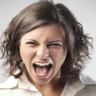

In [5]:
Image.open(str(paths["Angry"][0]))

In [6]:
X=[]
y=[]

for name, images in paths.items():
    for image in images:
        try:
            # print(name)
            image = str(image).strip()
            img = cv.imread(image)
            img_resize = cv.resize(img,(200,200))
            X.append(img_resize)
            y.append(labels[name])

        except:
            print('Except')

X = np.array(X)
y = np.array(y)
X.shape

(221, 200, 200, 3)

In [7]:
for label in y:
  print(label)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6


Text(0, 0.5, 'Count')

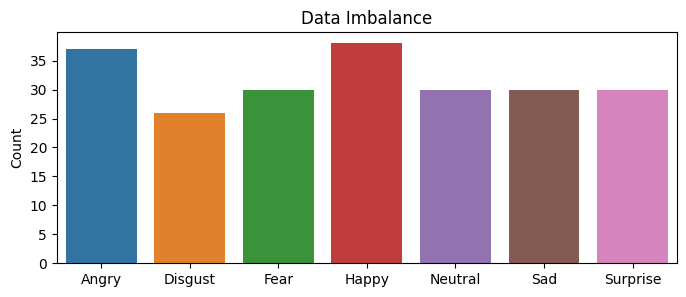

In [8]:
plt.figure(figsize=(8, 3))
g = sns.countplot(x = y)
g.set_xticks(range(len(list(labels.keys()))))
g.set_xticklabels(list(labels.keys()))
plt.title('Data Imbalance')
# plt.xlabel('emotions')
plt.ylabel('Count')

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape

(148, 200, 200, 3)

In [10]:
model = Sequential()

model.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(200,200,3)))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2), strides=1, padding="valid"))

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D())

#model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
#model.add(Dropout(0.2))
#model.add(MaxPooling2D())

model.add(Flatten())
#model.add(Dense(256,activation='relu'))
#model.add(Dropout(0.2))

model.add(Dense(64,activation='relu'))

model.add(Dense(7,activation='softmax'))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=30, batch_size = 20,
                    validation_data=(X_test, y_test))

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


8/8 [==============================] - 15s 320ms/step - loss: 12011.6328 - accuracy: 0.1351 - val_loss: 757.5815 - val_accuracy: 0.2466
Epoch 2/30
8/8 [==============================] - 1s 95ms/step - loss: 285.6206 - accuracy: 0.2838 - val_loss: 9.0842 - val_accuracy: 0.1096
Epoch 3/30
8/8 [==============================] - 1s 94ms/step - loss: 3.3311 - accuracy: 0.5676 - val_loss: 3.9466 - val_accuracy: 0.1781
Epoch 4/30
8/8 [==============================] - 1s 95ms/step - loss: 0.8542 - accuracy: 0.8311 - val_loss: 2.4757 - val_accuracy: 0.1644
Epoch 5/30
8/8 [==============================] - 1s 95ms/step - loss: 0.3491 - accuracy: 0.9189 - val_loss: 2.7029 - val_accuracy: 0.2329
Epoch 6/30
8/8 [==============================] - 1s 94ms/step - loss: 0.0799 - accuracy: 1.0000 - val_loss: 4.9608 - val_accuracy: 0.2603
Epoch 7/30
8/8 [==============================] - 1s 95ms/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 8.0109 - val_accuracy: 0.2329
Epoch 8/30
8/8 [============

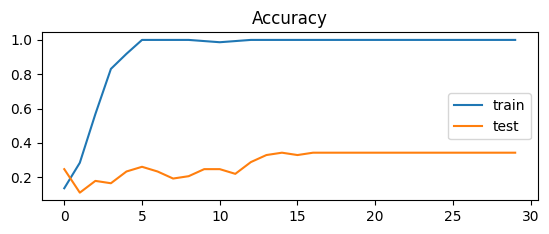

In [11]:
plt.subplot(211)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()

In [12]:
img_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    # rescale=1./255,
    rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.4,
    # brightness_range = [0.2, 0.5],
    vertical_flip = True,
    horizontal_flip = True,
    zoom_range = 0.2
    )

# img_gen.fit(X_train)
augmented_data_generator  = img_gen.flow(X_train, y_train, batch_size=20) # ,subset='training',shuffle=True
batch = augmented_data_generator.next()



In [13]:
X_train_aug = np.concatenate((X_train, batch[0]), axis=0)
y_train_aug = np.concatenate((y_train, batch[1]), axis=0)

In [14]:
X_train_aug.shape

(168, 200, 200, 3)

In [21]:
model = Sequential()

model.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(200,200,3)))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2), strides=1, padding="valid"))

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D())

#model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
#model.add(Dropout(0.2))
#model.add(MaxPooling2D())

model.add(Flatten())
#model.add(Dense(256,activation='relu'))
#model.add(Dropout(0.2))

model.add(Dense(64,activation='relu'))

model.add(Dense(7,activation='softmax'))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train_aug, y_train_aug, epochs=30, batch_size =50,
                    validation_data=(X_test, y_test))

Epoch 1/30
4/4 [==============================] - 2s 277ms/step - loss: 13793.5859 - accuracy: 0.1667 - val_loss: 2228.2744 - val_accuracy: 0.1644
Epoch 2/30
4/4 [==============================] - 1s 209ms/step - loss: 2127.2346 - accuracy: 0.1845 - val_loss: 119.1059 - val_accuracy: 0.1096
Epoch 3/30
4/4 [==============================] - 1s 204ms/step - loss: 71.7161 - accuracy: 0.3036 - val_loss: 11.3905 - val_accuracy: 0.0959
Epoch 4/30
4/4 [==============================] - 1s 205ms/step - loss: 5.9022 - accuracy: 0.5000 - val_loss: 4.0204 - val_accuracy: 0.1918
Epoch 5/30
4/4 [==============================] - 1s 202ms/step - loss: 0.9499 - accuracy: 0.6607 - val_loss: 3.3400 - val_accuracy: 0.2603
Epoch 6/30
4/4 [==============================] - 1s 213ms/step - loss: 0.5711 - accuracy: 0.8155 - val_loss: 3.7202 - val_accuracy: 0.2192
Epoch 7/30
4/4 [==============================] - 1s 208ms/step - loss: 0.4043 - accuracy: 0.8690 - val_loss: 3.3917 - val_accuracy: 0.2192
Epoch 

## Deepface


In [23]:
!pip install deepface
from deepface import DeepFace

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 14.0 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116934 sha256=5bb9279436d9471f9f5617115c50e63cb7ad29b9498a3ef97c3b5d443ebca8f9
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire
Directory  /root /.deepface created
Directory  /root /.deepface/weights created


In [24]:
objs = DeepFace.analyze(img_path = '/content/drive/MyDrive/Ironhack/Data/emotions/emotions/Angry/image 72.png',
        actions = ['age', 'gender', 'race', 'emotion'])

facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 14.5MB/s]


age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /root/.deepface/weights/age_model_weights.h5
100%|██████████| 539M/539M [00:06<00:00, 79.4MB/s]


gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /root/.deepface/weights/gender_model_weights.h5
100%|██████████| 537M/537M [00:02<00:00, 205MB/s]


race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: /root/.deepface/weights/race_model_single_batch.h5
100%|██████████| 537M/537M [00:01<00:00, 284MB/s]
Action: emotion: 100%|██████████| 4/4 [00:01<00:00,  2.01it/s]


In [25]:
objs

[{'age': 27,
  'region': {'x': 16, 'y': 19, 'w': 64, 'h': 64},
  'gender': {'Woman': 0.010792600369313732, 'Man': 99.98921155929565},
  'dominant_gender': 'Man',
  'race': {'asian': 7.705249695338797e-05,
   'indian': 0.0026949799150646934,
   'black': 99.99686479531107,
   'white': 7.02956332564854e-08,
   'middle eastern': 3.2244818995176366e-08,
   'latino hispanic': 0.0003640864158310566},
  'dominant_race': 'black',
  'emotion': {'angry': 70.22531032562256,
   'disgust': 0.021527649369090796,
   'fear': 19.682490825653076,
   'happy': 9.319017827510834,
   'sad': 0.5968871992081404,
   'surprise': 0.11439344380050898,
   'neutral': 0.04037504259031266},
  'dominant_emotion': 'angry'}]

In [35]:
folders_to_analyze = ["/content/drive/MyDrive/Ironhack/Data/emotions/emotions/Surprise/", "/content/drive/MyDrive/Ironhack/Data/emotions/emotions/Happy/", "/content/drive/MyDrive/Ironhack/Data/emotions/emotions/Disgust/","/content/drive/MyDrive/Ironhack/Data/emotions/emotions/Neutral/",
                      "/content/drive/MyDrive/Ironhack/Data/emotions/emotions/Fear/","/content/drive/MyDrive/Ironhack/Data/emotions/emotions/Sad/","/content/drive/MyDrive/Ironhack/Data/emotions/emotions/Angry/"]

In [45]:
correct_predictions = 0
for folder in folders_to_analyze:
  emotion=""
  if (folder=="/content/drive/MyDrive/Ironhack/Data/emotions/emotions/Surprise/"):
    print("Surprise \n -----------------------------------------------")
    emotion="surprise"
  elif (folder=="/content/drive/MyDrive/Ironhack/Data/emotions/emotions/Happy/"):
    print("Happy \n -----------------------------------------------")
    emotion="happy"
  elif (folder=="/content/drive/MyDrive/Ironhack/Data/emotions/emotions/Disgust/"):
    print("Disgust \n -----------------------------------------------")
    emotion="disgust"
  elif (folder=="/content/drive/MyDrive/Ironhack/Data/emotions/emotions/Neutral/"):
    print("Neutral \n -----------------------------------------------")
    emotion="neutral"
  elif (folder=="/content/drive/MyDrive/Ironhack/Data/emotions/emotions/Fear/"):
    print("Fear \n -----------------------------------------------")
    emotion="fear"
  elif (folder=="/content/drive/MyDrive/Ironhack/Data/emotions/emotions/Sad/"):
    print("Sad \n -----------------------------------------------")
    emotion="sad"
  elif (folder=="/content/drive/MyDrive/Ironhack/Data/emotions/emotions/Angry/"):
    print("Angry \n -----------------------------------------------")
    emotion="angry"

  image_files = [f for f in os.listdir(folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif'))]
  for image_file in image_files:
    image_path = os.path.join(folder, image_file)
    analysis = DeepFace.analyze(img_path = image_path, actions = ["emotion"],enforce_detection=False)
    pred_emotion=analysis[0]["dominant_emotion"]

    if (pred_emotion==emotion):
      correct_predictions+=1
    print(analysis)


Surprise 
 -----------------------------------------------


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.52it/s]


[{'emotion': {'angry': 0.08779795025475323, 'disgust': 9.875261497427346e-07, 'fear': 44.491612911224365, 'happy': 13.941149413585663, 'sad': 0.016720105486456305, 'surprise': 41.462716460227966, 'neutral': 3.982297513971389e-06}, 'dominant_emotion': 'fear', 'region': {'x': 17, 'y': 8, 'w': 69, 'h': 69}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.84it/s]


[{'emotion': {'angry': 0.029540162664438048, 'disgust': 3.45339361041159e-08, 'fear': 8.580706779998945, 'happy': 0.00010917380646316322, 'sad': 0.0005665486579612961, 'surprise': 91.37059994760752, 'neutral': 0.018479840592676586}, 'dominant_emotion': 'surprise', 'region': {'x': 9, 'y': 8, 'w': 78, 'h': 78}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.10it/s]


[{'emotion': {'angry': 0.0001959273049578769, 'disgust': 3.927404929049416e-09, 'fear': 0.09023991296999156, 'happy': 0.00015718401300546248, 'sad': 6.121335616171564e-06, 'surprise': 99.9094009399414, 'neutral': 1.4278289488245388e-09}, 'dominant_emotion': 'surprise', 'region': {'x': 16, 'y': 11, 'w': 68, 'h': 68}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.43it/s]


[{'emotion': {'angry': 3.5568700106991586e-08, 'disgust': 1.081350945367573e-15, 'fear': 6.200546088812912e-10, 'happy': 99.97094869440488, 'sad': 5.239615720520038e-08, 'surprise': 0.0004185461215727979, 'neutral': 0.028631843703275543}, 'dominant_emotion': 'happy', 'region': {'x': 16, 'y': 25, 'w': 63, 'h': 63}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.90it/s]


[{'emotion': {'angry': 1.9796898342860914e-06, 'disgust': 1.5976117455872296e-11, 'fear': 8.300384024551022e-05, 'happy': 0.042629954987205565, 'sad': 0.008484833233524114, 'surprise': 2.0265479960812627e-06, 'neutral': 99.94879961013794}, 'dominant_emotion': 'neutral', 'region': {'x': 0, 'y': 0, 'w': 96, 'h': 96}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.87it/s]


[{'emotion': {'angry': 0.09360611996687174, 'disgust': 2.5571052009549124e-09, 'fear': 19.759575710271342, 'happy': 0.005436067255012043, 'sad': 1.076524489324569e-07, 'surprise': 80.14138222583426, 'neutral': 8.336311305204076e-10}, 'dominant_emotion': 'surprise', 'region': {'x': 8, 'y': 10, 'w': 66, 'h': 66}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.46it/s]


[{'emotion': {'angry': 0.0015597501219967234, 'disgust': 1.2157771808170729e-15, 'fear': 1.5440346695143379, 'happy': 79.68465928022155, 'sad': 0.00016017096777984162, 'surprise': 18.769583848764437, 'neutral': 8.609884239301723e-11}, 'dominant_emotion': 'happy', 'region': {'x': 12, 'y': 7, 'w': 70, 'h': 70}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.74it/s]


[{'emotion': {'angry': 4.715898782592376e-07, 'disgust': 9.63428839969087e-16, 'fear': 0.07790980162099004, 'happy': 2.1242289705014628e-06, 'sad': 6.252005579909792e-08, 'surprise': 99.92208480834961, 'neutral': 2.1488707081102065e-10}, 'dominant_emotion': 'surprise', 'region': {'x': 4, 'y': 11, 'w': 69, 'h': 69}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.99it/s]


[{'emotion': {'angry': 2.15615955645454e-08, 'disgust': 1.1413701755826927e-16, 'fear': 0.0020752073396579362, 'happy': 2.437212098804764e-08, 'sad': 9.151275657398594e-11, 'surprise': 99.99792575836182, 'neutral': 1.2347637018753077e-11}, 'dominant_emotion': 'surprise', 'region': {'x': 12, 'y': 16, 'w': 66, 'h': 66}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.37it/s]


[{'emotion': {'angry': 0.0024514529286534525, 'disgust': 3.1053413692468806e-14, 'fear': 0.17619474092498422, 'happy': 0.00250828579737572, 'sad': 4.0379492284581264e-10, 'surprise': 99.81884360313416, 'neutral': 1.3100230233931143e-06}, 'dominant_emotion': 'surprise', 'region': {'x': 8, 'y': 21, 'w': 73, 'h': 73}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 17.35it/s]


[{'emotion': {'angry': 0.012954226896966767, 'disgust': 3.896385353673102e-10, 'fear': 0.36140722570929223, 'happy': 0.00018949469919111905, 'sad': 0.023545086254578976, 'surprise': 99.58254103868711, 'neutral': 0.01936732793318296}, 'dominant_emotion': 'surprise', 'region': {'x': 4, 'y': 25, 'w': 64, 'h': 64}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 19.52it/s]


[{'emotion': {'angry': 0.08259586354506153, 'disgust': 7.939692955851685e-08, 'fear': 2.2039191032744525, 'happy': 8.5970972660664, 'sad': 0.027747888419097554, 'surprise': 88.66636888189687, 'neutral': 0.42226975406470846}, 'dominant_emotion': 'surprise', 'region': {'x': 17, 'y': 16, 'w': 66, 'h': 66}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 17.62it/s]


[{'emotion': {'angry': 2.663192510965473e-06, 'disgust': 1.5433175269966106e-17, 'fear': 4.3021310120821, 'happy': 45.96034586429596, 'sad': 3.903505643720884e-09, 'surprise': 49.73751604557037, 'neutral': 1.734542143163459e-11}, 'dominant_emotion': 'surprise', 'region': {'x': 7, 'y': 5, 'w': 76, 'h': 76}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 19.33it/s]


[{'emotion': {'angry': 7.892913753138053e-10, 'disgust': 9.37661419425509e-16, 'fear': 5.710765904609616e-06, 'happy': 8.896296920706329e-12, 'sad': 1.0904908627232756e-13, 'surprise': 100.0, 'neutral': 1.2617641811647692e-18}, 'dominant_emotion': 'surprise', 'region': {'x': 8, 'y': 6, 'w': 70, 'h': 70}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 20.61it/s]


[{'emotion': {'angry': 0.0002697626702494439, 'disgust': 1.6187801779841508e-12, 'fear': 0.002878327712673204, 'happy': 8.848521660999463e-05, 'sad': 7.255603772829145e-08, 'surprise': 99.99676346759578, 'neutral': 1.7915085761331764e-08}, 'dominant_emotion': 'surprise', 'region': {'x': 5, 'y': 14, 'w': 69, 'h': 69}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 20.66it/s]


[{'emotion': {'angry': 2.9236620177792993e-11, 'disgust': 2.2715901364946747e-21, 'fear': 4.237822892605436e-06, 'happy': 1.736907926513931e-10, 'sad': 1.2587722747828267e-13, 'surprise': 100.0, 'neutral': 7.997400544104786e-21}, 'dominant_emotion': 'surprise', 'region': {'x': 12, 'y': 14, 'w': 74, 'h': 74}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 15.84it/s]


[{'emotion': {'angry': 1.4098799283601693e-05, 'disgust': 2.0921493568614932e-13, 'fear': 0.09419418056495488, 'happy': 99.39059615135193, 'sad': 4.957253167958697e-05, 'surprise': 0.5151464138180017, 'neutral': 3.2207950084739423e-06}, 'dominant_emotion': 'happy', 'region': {'x': 11, 'y': 12, 'w': 65, 'h': 65}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 17.58it/s]


[{'emotion': {'angry': 1.9927721695012224e-07, 'disgust': 7.570769894647096e-15, 'fear': 1.4719538476981597e-06, 'happy': 3.5969207612396303e-07, 'sad': 1.8542639785082754e-15, 'surprise': 100.0, 'neutral': 5.486480269206534e-18}, 'dominant_emotion': 'surprise', 'region': {'x': 9, 'y': 13, 'w': 69, 'h': 69}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 18.79it/s]


[{'emotion': {'angry': 0.551158981397748, 'disgust': 5.304035965991716e-06, 'fear': 8.890607953071594, 'happy': 0.42491238564252853, 'sad': 0.0008321271707245614, 'surprise': 90.13247489929199, 'neutral': 8.046760058277869e-06}, 'dominant_emotion': 'surprise', 'region': {'x': 20, 'y': 24, 'w': 55, 'h': 55}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 19.04it/s]


[{'emotion': {'angry': 3.9967049831573676e-07, 'disgust': 2.5530041908999782e-17, 'fear': 2.5772038520696077, 'happy': 6.392176946842672e-07, 'sad': 8.53753674240955e-08, 'surprise': 97.42279633419491, 'neutral': 3.8988803525153034e-12}, 'dominant_emotion': 'surprise', 'region': {'x': 11, 'y': 20, 'w': 72, 'h': 72}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 19.24it/s]


[{'emotion': {'angry': 4.038027169586847, 'disgust': 0.01001371770713286, 'fear': 2.68287991332292, 'happy': 0.27797999120384403, 'sad': 0.004090434838936506, 'surprise': 92.98682767074273, 'neutral': 0.00018417221060181872}, 'dominant_emotion': 'surprise', 'region': {'x': 8, 'y': 18, 'w': 68, 'h': 68}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 20.13it/s]


[{'emotion': {'angry': 2.6207324117422104, 'disgust': 8.420562380706542e-05, 'fear': 94.70908641815186, 'happy': 0.0037637651985278353, 'sad': 0.784993264824152, 'surprise': 0.6075206212699413, 'neutral': 1.273826602846384}, 'dominant_emotion': 'fear', 'region': {'x': 0, 'y': 0, 'w': 96, 'h': 96}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 18.86it/s]


[{'emotion': {'angry': 0.00027119128844788065, 'disgust': 2.0353079403865725e-13, 'fear': 0.2903621643781662, 'happy': 6.214391419234744e-05, 'sad': 3.0760678448871204e-07, 'surprise': 99.70930814743042, 'neutral': 1.7855922296305948e-08}, 'dominant_emotion': 'surprise', 'region': {'x': 6, 'y': 16, 'w': 66, 'h': 66}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 16.76it/s]


[{'emotion': {'angry': 0.05932558560743928, 'disgust': 1.480838474066104e-06, 'fear': 0.2550166565924883, 'happy': 54.83793616294861, 'sad': 0.017778064648155123, 'surprise': 44.823241233825684, 'neutral': 0.0067044689785689116}, 'dominant_emotion': 'happy', 'region': {'x': 5, 'y': 9, 'w': 77, 'h': 77}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 19.19it/s]


[{'emotion': {'angry': 4.424780897238634e-06, 'disgust': 1.6216210855889615e-15, 'fear': 0.08632864337414503, 'happy': 2.108639929332412e-08, 'sad': 6.795118423497115e-06, 'surprise': 99.91366267204285, 'neutral': 9.50783451969528e-08}, 'dominant_emotion': 'surprise', 'region': {'x': 17, 'y': 3, 'w': 65, 'h': 65}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 17.54it/s]


[{'emotion': {'angry': 0.010723895595948508, 'disgust': 8.980992596456093e-08, 'fear': 86.87417428935613, 'happy': 0.005278272825232205, 'sad': 3.970849486093896e-06, 'surprise': 13.10981739221915, 'neutral': 1.6106057726047883e-08}, 'dominant_emotion': 'fear', 'region': {'x': 9, 'y': 14, 'w': 69, 'h': 69}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 17.05it/s]


[{'emotion': {'angry': 2.4801082076919556e-05, 'disgust': 3.159789573538673e-15, 'fear': 44.26933825016022, 'happy': 0.130108545999974, 'sad': 1.705573599020127e-08, 'surprise': 55.60052990913391, 'neutral': 2.824251368118173e-14}, 'dominant_emotion': 'surprise', 'region': {'x': 8, 'y': 16, 'w': 64, 'h': 64}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 18.22it/s]


[{'emotion': {'angry': 3.965340056311106e-06, 'disgust': 1.8258693032990533e-13, 'fear': 0.504691619426012, 'happy': 87.8803014755249, 'sad': 0.00033647979762463365, 'surprise': 11.61467358469963, 'neutral': 1.510478964128481e-07}, 'dominant_emotion': 'happy', 'region': {'x': 12, 'y': 7, 'w': 75, 'h': 75}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 18.25it/s]


[{'emotion': {'angry': 0.0011094358342234045, 'disgust': 3.580570726316233e-15, 'fear': 0.0033291631552856416, 'happy': 1.0161053422275135e-09, 'sad': 0.0020871571905445307, 'surprise': 5.5534303555759834e-05, 'neutral': 99.9934196472168}, 'dominant_emotion': 'neutral', 'region': {'x': 8, 'y': 11, 'w': 71, 'h': 71}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 19.68it/s]


[{'emotion': {'angry': 0.000845418526296271, 'disgust': 3.351667901552169e-10, 'fear': 28.4338116645813, 'happy': 3.3714480698108673, 'sad': 4.889986371381383e-06, 'surprise': 68.1938886642456, 'neutral': 3.65634571231066e-09}, 'dominant_emotion': 'surprise', 'region': {'x': 7, 'y': 14, 'w': 66, 'h': 66}}]
Happy 
 -----------------------------------------------


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 20.19it/s]


[{'emotion': {'angry': 0.68914633626618, 'disgust': 1.8245933852213531e-06, 'fear': 0.3170336087142592, 'happy': 96.9195304465014, 'sad': 0.004513981089829271, 'surprise': 2.0323156659195223, 'neutral': 0.03746069783576267}, 'dominant_emotion': 'happy', 'region': {'x': 15, 'y': 18, 'w': 62, 'h': 62}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 19.47it/s]


[{'emotion': {'angry': 9.558503542743121e-09, 'disgust': 6.475375050499813e-19, 'fear': 5.784765398770314e-06, 'happy': 99.99942779547837, 'sad': 3.2644345137988895e-09, 'surprise': 2.997342683122883e-07, 'neutral': 0.0005649457543326481}, 'dominant_emotion': 'happy', 'region': {'x': 14, 'y': 8, 'w': 74, 'h': 74}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 19.01it/s]


[{'emotion': {'angry': 3.0376950954646986e-09, 'disgust': 2.106934960700857e-11, 'fear': 4.3795780335642576e-07, 'happy': 99.9982476234436, 'sad': 0.0002782777073662146, 'surprise': 1.2079019728883367e-08, 'neutral': 0.0014745352018508129}, 'dominant_emotion': 'happy', 'region': {'x': 23, 'y': 17, 'w': 48, 'h': 48}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 20.04it/s]


[{'emotion': {'angry': 0.48700881299429016, 'disgust': 0.0021113902570251155, 'fear': 0.1581504569590364, 'happy': 98.62389556311939, 'sad': 0.5196663395116532, 'surprise': 0.0010321829610303599, 'neutral': 0.20813084051047806}, 'dominant_emotion': 'happy', 'region': {'x': 18, 'y': 23, 'w': 62, 'h': 62}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 20.14it/s]


[{'emotion': {'angry': 0.48700881299429016, 'disgust': 0.0021113902570251155, 'fear': 0.1581504569590364, 'happy': 98.62389556311939, 'sad': 0.5196663395116532, 'surprise': 0.0010321829610303599, 'neutral': 0.20813084051047806}, 'dominant_emotion': 'happy', 'region': {'x': 18, 'y': 23, 'w': 62, 'h': 62}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 17.37it/s]


[{'emotion': {'angry': 0.6066549569368362, 'disgust': 6.265440077868334e-06, 'fear': 3.2296299934387207, 'happy': 0.029410456772893667, 'sad': 5.987609922885895, 'surprise': 0.05472353077493608, 'neutral': 90.09196758270264}, 'dominant_emotion': 'neutral', 'region': {'x': 23, 'y': 22, 'w': 52, 'h': 52}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 15.23it/s]


[{'emotion': {'angry': 5.3603345720465434e-11, 'disgust': 9.01640102572601e-16, 'fear': 4.4214895382943455e-13, 'happy': 99.94352459907532, 'sad': 1.2899307400005e-06, 'surprise': 1.1071823319275254e-08, 'neutral': 0.0564775662496686}, 'dominant_emotion': 'happy', 'region': {'x': 14, 'y': 14, 'w': 54, 'h': 54}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 19.14it/s]


[{'emotion': {'angry': 0.0004717103473267513, 'disgust': 1.0045462327105464e-07, 'fear': 7.257693978345256e-06, 'happy': 94.10226274755749, 'sad': 0.0272236767780321, 'surprise': 1.3633760635915926e-06, 'neutral': 5.870037480597196}, 'dominant_emotion': 'happy', 'region': {'x': 17, 'y': 11, 'w': 58, 'h': 58}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 17.86it/s]


[{'emotion': {'angry': 2.6568383604264056e-08, 'disgust': 2.0155038137713994e-15, 'fear': 5.830088582042814e-10, 'happy': 99.9198853969574, 'sad': 6.769122595784438e-07, 'surprise': 0.0002380267005719361, 'neutral': 0.0798805383965373}, 'dominant_emotion': 'happy', 'region': {'x': 21, 'y': 3, 'w': 67, 'h': 67}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 17.61it/s]


[{'emotion': {'angry': 1.1045902629261286e-05, 'disgust': 2.502654613911481e-15, 'fear': 1.4298100223379307e-07, 'happy': 99.99831318845231, 'sad': 1.724515744188342e-05, 'surprise': 2.351257959700926e-05, 'neutral': 0.001635840369277898}, 'dominant_emotion': 'happy', 'region': {'x': 9, 'y': 3, 'w': 82, 'h': 82}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 17.68it/s]


[{'emotion': {'angry': 1.1045902629261286e-05, 'disgust': 2.502654613911481e-15, 'fear': 1.4298100223379307e-07, 'happy': 99.99831318845231, 'sad': 1.724515744188342e-05, 'surprise': 2.351257959700926e-05, 'neutral': 0.001635840369277898}, 'dominant_emotion': 'happy', 'region': {'x': 9, 'y': 3, 'w': 82, 'h': 82}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 18.94it/s]


[{'emotion': {'angry': 8.306862042672947e-06, 'disgust': 1.1280878981596507e-11, 'fear': 1.5155941923694627e-05, 'happy': 99.99786615371704, 'sad': 7.400736690144072e-08, 'surprise': 4.7254786750272615e-05, 'neutral': 0.0020607600163202733}, 'dominant_emotion': 'happy', 'region': {'x': 18, 'y': 20, 'w': 57, 'h': 57}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 16.58it/s]


[{'emotion': {'angry': 0.0007617685696459375, 'disgust': 8.65425488433616e-12, 'fear': 2.5374937706601486e-06, 'happy': 99.23731684684753, 'sad': 0.0010712498806242365, 'surprise': 2.4111592722420028e-06, 'neutral': 0.7608505897223949}, 'dominant_emotion': 'happy', 'region': {'x': 19, 'y': 17, 'w': 54, 'h': 54}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 19.67it/s]


[{'emotion': {'angry': 6.757824522196643e-07, 'disgust': 1.4074562031791103e-12, 'fear': 1.719870246219557e-07, 'happy': 83.92142653465271, 'sad': 5.138527967574191e-05, 'surprise': 0.0004905610239802627, 'neutral': 16.078031063079834}, 'dominant_emotion': 'happy', 'region': {'x': 12, 'y': 14, 'w': 72, 'h': 72}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 18.59it/s]


[{'emotion': {'angry': 0.9206623770296574, 'disgust': 0.005928770042373799, 'fear': 0.05470325122587383, 'happy': 54.34965491294861, 'sad': 1.3450456783175468, 'surprise': 0.23495040368288755, 'neutral': 43.08905303478241}, 'dominant_emotion': 'happy', 'region': {'x': 16, 'y': 21, 'w': 57, 'h': 57}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 16.83it/s]


[{'emotion': {'angry': 0.07074007560008175, 'disgust': 0.00011052202533969003, 'fear': 0.19341860875262126, 'happy': 97.52997726559369, 'sad': 0.9745132408455898, 'surprise': 0.13454739676980934, 'neutral': 1.09669812058784}, 'dominant_emotion': 'happy', 'region': {'x': 26, 'y': 5, 'w': 56, 'h': 56}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 18.33it/s]


[{'emotion': {'angry': 0.00010728608188501372, 'disgust': 5.155701173536586e-08, 'fear': 0.0007499342238112962, 'happy': 89.96865093521183, 'sad': 0.0021589919392606097, 'surprise': 0.0002467931755507721, 'neutral': 10.028087945466515}, 'dominant_emotion': 'happy', 'region': {'x': 19, 'y': 16, 'w': 59, 'h': 59}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 19.20it/s]


[{'emotion': {'angry': 2.0846551030059034e-12, 'disgust': 6.242782499463592e-16, 'fear': 2.546112257632417e-09, 'happy': 99.99951720234854, 'sad': 3.5183562606570114e-07, 'surprise': 2.9553108251279455e-09, 'neutral': 0.00048530426447987364}, 'dominant_emotion': 'happy', 'region': {'x': 18, 'y': 23, 'w': 59, 'h': 59}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 18.18it/s]


[{'emotion': {'angry': 7.117846756443669e-07, 'disgust': 3.8575232282544655e-12, 'fear': 2.153369571544772e-06, 'happy': 99.95324611663818, 'sad': 0.014815753092989326, 'surprise': 1.8699596537885554e-06, 'neutral': 0.03193434386048466}, 'dominant_emotion': 'happy', 'region': {'x': 18, 'y': 20, 'w': 60, 'h': 60}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.91it/s]


[{'emotion': {'angry': 9.626839603260606e-09, 'disgust': 2.787993473409548e-20, 'fear': 1.6771549427030408e-10, 'happy': 99.99998807907104, 'sad': 5.1931241018586885e-12, 'surprise': 5.126992146803344e-10, 'neutral': 1.2475456401261908e-05}, 'dominant_emotion': 'happy', 'region': {'x': 16, 'y': 12, 'w': 71, 'h': 71}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 19.40it/s]


[{'emotion': {'angry': 4.291305366610487e-08, 'disgust': 5.758534518370342e-12, 'fear': 3.268407056111755e-06, 'happy': 94.09441947937012, 'sad': 0.008975819946499541, 'surprise': 8.417841002028581e-06, 'neutral': 5.896592512726784}, 'dominant_emotion': 'happy', 'region': {'x': 27, 'y': 25, 'w': 33, 'h': 33}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 20.16it/s]


[{'emotion': {'angry': 0.0002930010115979842, 'disgust': 1.5950937522334827e-06, 'fear': 0.02368720302216801, 'happy': 87.9680745582625, 'sad': 0.005547171861998736, 'surprise': 0.013916903946718065, 'neutral': 11.988481103687352}, 'dominant_emotion': 'happy', 'region': {'x': 25, 'y': 19, 'w': 43, 'h': 43}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.80it/s]


[{'emotion': {'angry': 0.9206623770296574, 'disgust': 0.005928770042373799, 'fear': 0.05470325122587383, 'happy': 54.34965491294861, 'sad': 1.3450456783175468, 'surprise': 0.23495040368288755, 'neutral': 43.08905303478241}, 'dominant_emotion': 'happy', 'region': {'x': 16, 'y': 21, 'w': 57, 'h': 57}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.14it/s]


[{'emotion': {'angry': 0.0028047686715823505, 'disgust': 6.530124442479549e-09, 'fear': 0.001185083924912142, 'happy': 98.91465889390217, 'sad': 0.026059220741112023, 'surprise': 0.0008569371060006782, 'neutral': 1.0544373048171167}, 'dominant_emotion': 'happy', 'region': {'x': 19, 'y': 17, 'w': 64, 'h': 64}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.20it/s]


[{'emotion': {'angry': 2.8951688268996634e-09, 'disgust': 8.704589089969552e-17, 'fear': 3.8061154434328864e-12, 'happy': 99.99997615814209, 'sad': 2.1770332932213865e-10, 'surprise': 3.397793385626763e-11, 'neutral': 2.3733910836654104e-05}, 'dominant_emotion': 'happy', 'region': {'x': 0, 'y': 0, 'w': 96, 'h': 96}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.90it/s]


[{'emotion': {'angry': 0.00025803037715377286, 'disgust': 7.790660339068722e-08, 'fear': 0.0007337252554862062, 'happy': 98.06824922561646, 'sad': 0.0009384703844261821, 'surprise': 0.00778800604166463, 'neutral': 1.9220324233174324}, 'dominant_emotion': 'happy', 'region': {'x': 7, 'y': 2, 'w': 72, 'h': 72}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.68it/s]


[{'emotion': {'angry': 7.617320194715474e-05, 'disgust': 3.822123939126251e-07, 'fear': 5.885462295355579e-05, 'happy': 99.65367321328245, 'sad': 0.3040313125438914, 'surprise': 3.112837616294335e-05, 'neutral': 0.04212802239471407}, 'dominant_emotion': 'happy', 'region': {'x': 29, 'y': 22, 'w': 41, 'h': 41}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.16it/s]


[{'emotion': {'angry': 5.1125050504197134e-05, 'disgust': 1.001658755939161e-08, 'fear': 5.049534124168531e-06, 'happy': 99.24404621124268, 'sad': 0.000494671758133336, 'surprise': 0.012791695189662278, 'neutral': 0.7426201365888119}, 'dominant_emotion': 'happy', 'region': {'x': 21, 'y': 22, 'w': 45, 'h': 45}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.77it/s]


[{'emotion': {'angry': 2.0846551030059034e-12, 'disgust': 6.242782499463592e-16, 'fear': 2.546112257632417e-09, 'happy': 99.99951720234854, 'sad': 3.5183562606570114e-07, 'surprise': 2.9553108251279455e-09, 'neutral': 0.00048530426447987364}, 'dominant_emotion': 'happy', 'region': {'x': 18, 'y': 23, 'w': 59, 'h': 59}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.48it/s]


[{'emotion': {'angry': 7.617320194715474e-05, 'disgust': 3.822123939126251e-07, 'fear': 5.885462295355579e-05, 'happy': 99.65367321328245, 'sad': 0.3040313125438914, 'surprise': 3.112837616294335e-05, 'neutral': 0.04212802239471407}, 'dominant_emotion': 'happy', 'region': {'x': 29, 'y': 22, 'w': 41, 'h': 41}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.16it/s]


[{'emotion': {'angry': 0.0006778835086151958, 'disgust': 4.1370656900241443e-10, 'fear': 2.579362690448761, 'happy': 97.06563353538513, 'sad': 0.0047514262405456975, 'surprise': 0.349262822419405, 'neutral': 0.00030847622838336974}, 'dominant_emotion': 'happy', 'region': {'x': 33, 'y': 11, 'w': 60, 'h': 60}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.18it/s]


[{'emotion': {'angry': 0.0007301013777615956, 'disgust': 7.535143521275739e-06, 'fear': 92.6187881685748, 'happy': 7.376962020759342, 'sad': 0.0010163256472771217, 'surprise': 0.00038841753766004014, 'neutral': 0.002098780464538001}, 'dominant_emotion': 'fear', 'region': {'x': 17, 'y': 28, 'w': 59, 'h': 59}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.60it/s]


[{'emotion': {'angry': 2.8951688268996634e-09, 'disgust': 8.704589089969552e-17, 'fear': 3.8061154434328864e-12, 'happy': 99.99997615814209, 'sad': 2.1770332932213865e-10, 'surprise': 3.397793385626763e-11, 'neutral': 2.3733910836654104e-05}, 'dominant_emotion': 'happy', 'region': {'x': 0, 'y': 0, 'w': 96, 'h': 96}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.36it/s]


[{'emotion': {'angry': 0.0006778835086151958, 'disgust': 4.1370656900241443e-10, 'fear': 2.579362690448761, 'happy': 97.06563353538513, 'sad': 0.0047514262405456975, 'surprise': 0.349262822419405, 'neutral': 0.00030847622838336974}, 'dominant_emotion': 'happy', 'region': {'x': 33, 'y': 11, 'w': 60, 'h': 60}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.54it/s]


[{'emotion': {'angry': 0.00010728608188501372, 'disgust': 5.155701173536586e-08, 'fear': 0.0007499342238112962, 'happy': 89.96865093521183, 'sad': 0.0021589919392606097, 'surprise': 0.0002467931755507721, 'neutral': 10.028087945466515}, 'dominant_emotion': 'happy', 'region': {'x': 19, 'y': 16, 'w': 59, 'h': 59}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.08it/s]


[{'emotion': {'angry': 3.5923260893744313e-10, 'disgust': 2.517378445081208e-15, 'fear': 4.435288074311483e-10, 'happy': 99.99860525131226, 'sad': 4.3938738758519946e-08, 'surprise': 2.4018800282021857e-07, 'neutral': 0.0013938451957073994}, 'dominant_emotion': 'happy', 'region': {'x': 19, 'y': 23, 'w': 60, 'h': 60}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.45it/s]


[{'emotion': {'angry': 47.64118790626526, 'disgust': 1.710163801908493, 'fear': 2.9142851009964943, 'happy': 0.15979872550815344, 'sad': 0.14069767203181982, 'surprise': 1.76882054656744, 'neutral': 45.66504657268524}, 'dominant_emotion': 'angry', 'region': {'x': 0, 'y': 0, 'w': 96, 'h': 96}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.30it/s]


[{'emotion': {'angry': 8.394943019296521e-08, 'disgust': 5.765856530134944e-13, 'fear': 6.986025508148185e-08, 'happy': 99.9851763239608, 'sad': 8.682525794045441e-06, 'surprise': 1.5435516896520344e-06, 'neutral': 0.014815116602152085}, 'dominant_emotion': 'happy', 'region': {'x': 20, 'y': 22, 'w': 45, 'h': 45}}]
Disgust 
 -----------------------------------------------


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.40it/s]


[{'emotion': {'angry': 14.4540473818779, 'disgust': 67.56582856178284, 'fear': 8.12365636229515, 'happy': 7.335458906965187e-07, 'sad': 9.31398943066597, 'surprise': 0.0003637324198280112, 'neutral': 0.5421143025159836}, 'dominant_emotion': 'disgust', 'region': {'x': 11, 'y': 15, 'w': 72, 'h': 72}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.87it/s]


[{'emotion': {'angry': 0.0010420261787658092, 'disgust': 8.824309338795189e-10, 'fear': 66.33222699165344, 'happy': 0.00048793485802889336, 'sad': 33.583253622055054, 'surprise': 2.746887872717707e-06, 'neutral': 0.08298640022985637}, 'dominant_emotion': 'fear', 'region': {'x': 0, 'y': 0, 'w': 96, 'h': 96}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.78it/s]


[{'emotion': {'angry': 1.3937855970135686, 'disgust': 0.0007100625194058532, 'fear': 3.776968123136051, 'happy': 0.4727811368722401, 'sad': 8.621147043773355, 'surprise': 0.05754047067145828, 'neutral': 85.67706857186964}, 'dominant_emotion': 'neutral', 'region': {'x': 10, 'y': 24, 'w': 63, 'h': 63}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.02it/s]


[{'emotion': {'angry': 19.184279441833496, 'disgust': 6.147791817784309, 'fear': 64.38733339309692, 'happy': 0.01201847189804539, 'sad': 9.805325418710709, 'surprise': 0.336981238797307, 'neutral': 0.12626972747966647}, 'dominant_emotion': 'fear', 'region': {'x': 9, 'y': 33, 'w': 61, 'h': 61}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.95it/s]


[{'emotion': {'angry': 73.38135083802645, 'disgust': 4.01729257507876, 'fear': 10.806765306399186, 'happy': 0.09975014849008015, 'sad': 10.271572933886823, 'surprise': 1.254677940438863, 'neutral': 0.16858895382815325}, 'dominant_emotion': 'angry', 'region': {'x': 10, 'y': 20, 'w': 67, 'h': 67}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.15it/s]


[{'emotion': {'angry': 19.73225176334381, 'disgust': 67.80073046684265, 'fear': 8.90553742647171, 'happy': 0.0027118128855363466, 'sad': 1.750333048403263, 'surprise': 1.3413487933576107, 'neutral': 0.46708565205335617}, 'dominant_emotion': 'disgust', 'region': {'x': 15, 'y': 27, 'w': 63, 'h': 63}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.54it/s]


[{'emotion': {'angry': 0.0011828438800876029, 'disgust': 7.596429561773643e-10, 'fear': 0.2453946741297841, 'happy': 7.14387704547903e-07, 'sad': 99.60721731185913, 'surprise': 4.743319706603617e-13, 'neutral': 0.14620639849454165}, 'dominant_emotion': 'sad', 'region': {'x': 0, 'y': 0, 'w': 96, 'h': 96}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.20it/s]


[{'emotion': {'angry': 0.1286313247237399, 'disgust': 0.0002527580059584113, 'fear': 8.813450265732424, 'happy': 0.39472000232160104, 'sad': 38.684006850958276, 'surprise': 0.0075081338691716714, 'neutral': 51.971432684149306}, 'dominant_emotion': 'neutral', 'region': {'x': 12, 'y': 28, 'w': 64, 'h': 64}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.67it/s]


[{'emotion': {'angry': 0.07635660585947335, 'disgust': 0.0012116682228224818, 'fear': 0.06030168733559549, 'happy': 93.35296750068665, 'sad': 0.3464392153546214, 'surprise': 0.870429165661335, 'neutral': 5.2922941744327545}, 'dominant_emotion': 'happy', 'region': {'x': 5, 'y': 17, 'w': 61, 'h': 61}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.54it/s]


[{'emotion': {'angry': 47.080796783017924, 'disgust': 19.762938902553255, 'fear': 32.47164383361601, 'happy': 0.003447543918753798, 'sad': 0.6480147517034264, 'surprise': 0.0309995626881458, 'neutral': 0.0021665438380174392}, 'dominant_emotion': 'angry', 'region': {'x': 18, 'y': 30, 'w': 60, 'h': 60}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.53it/s]


[{'emotion': {'angry': 0.35744442138820887, 'disgust': 0.03335103683639318, 'fear': 33.752256631851196, 'happy': 0.061509665101766586, 'sad': 58.16461443901062, 'surprise': 0.00011972094853263116, 'neutral': 7.630706578493118}, 'dominant_emotion': 'sad', 'region': {'x': 14, 'y': 13, 'w': 73, 'h': 73}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.09it/s]


[{'emotion': {'angry': 26.32700800895691, 'disgust': 6.9172970950603485, 'fear': 41.92110598087311, 'happy': 0.7463501300662756, 'sad': 18.745894730091095, 'surprise': 5.246919021010399, 'neutral': 0.09541935287415981}, 'dominant_emotion': 'fear', 'region': {'x': 17, 'y': 20, 'w': 67, 'h': 67}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.87it/s]


[{'emotion': {'angry': 0.026239515864290297, 'disgust': 3.9218911451754934e-08, 'fear': 3.931025043129921, 'happy': 0.001922198134707287, 'sad': 4.5823171734809875, 'surprise': 5.189813379047337e-06, 'neutral': 91.45849347114563}, 'dominant_emotion': 'neutral', 'region': {'x': 26, 'y': 21, 'w': 58, 'h': 58}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.55it/s]


[{'emotion': {'angry': 21.633298695087433, 'disgust': 2.3459261283278465, 'fear': 12.404165416955948, 'happy': 1.1894813738763332, 'sad': 18.551424145698547, 'surprise': 0.405842624604702, 'neutral': 43.4698611497879}, 'dominant_emotion': 'neutral', 'region': {'x': 9, 'y': 24, 'w': 64, 'h': 64}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.33it/s]


[{'emotion': {'angry': 99.81945157051086, 'disgust': 2.718544749313878e-05, 'fear': 0.07817509467713535, 'happy': 5.887599741072336e-07, 'sad': 0.10227770544588566, 'surprise': 1.4490720445792249e-05, 'neutral': 5.129030000716739e-05}, 'dominant_emotion': 'angry', 'region': {'x': 34, 'y': 29, 'w': 60, 'h': 60}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.65it/s]


[{'emotion': {'angry': 88.01525759787903, 'disgust': 1.2797674083875217e-05, 'fear': 0.9870222426666166, 'happy': 0.007158182114943541, 'sad': 6.8636324622412, 'surprise': 0.11969439933117625, 'neutral': 4.007226840092351}, 'dominant_emotion': 'angry', 'region': {'x': 17, 'y': 18, 'w': 63, 'h': 63}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.32it/s]


[{'emotion': {'angry': 38.85428309440613, 'disgust': 3.2128295579525457e-07, 'fear': 0.11848877184092999, 'happy': 0.00035731079606193816, 'sad': 7.022283226251602, 'surprise': 4.1471133727100096e-05, 'neutral': 54.004549980163574}, 'dominant_emotion': 'neutral', 'region': {'x': 26, 'y': 21, 'w': 67, 'h': 67}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.35it/s]


[{'emotion': {'angry': 11.819066066686277, 'disgust': 0.0001097411151858921, 'fear': 3.946063530210467, 'happy': 0.00030019763896575795, 'sad': 80.14052391889834, 'surprise': 0.00017698778183245964, 'neutral': 4.0937627311803535}, 'dominant_emotion': 'sad', 'region': {'x': 32, 'y': 26, 'w': 60, 'h': 60}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.69it/s]


[{'emotion': {'angry': 10.122811652589538, 'disgust': 0.14517737719356283, 'fear': 41.64222429050352, 'happy': 0.69075291436928, 'sad': 23.119272179560195, 'surprise': 0.7261153743335828, 'neutral': 23.55364701471609}, 'dominant_emotion': 'fear', 'region': {'x': 22, 'y': 15, 'w': 64, 'h': 64}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 15.95it/s]


[{'emotion': {'angry': 0.4604560788720846, 'disgust': 9.803557787790851e-06, 'fear': 27.699914574623108, 'happy': 0.0002599961817395524, 'sad': 31.718438863754272, 'surprise': 0.053165602730587125, 'neutral': 40.06775617599487}, 'dominant_emotion': 'neutral', 'region': {'x': 19, 'y': 23, 'w': 62, 'h': 62}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 18.61it/s]


[{'emotion': {'angry': 93.23524752083391, 'disgust': 0.02981667122015163, 'fear': 6.022813144065516, 'happy': 0.0002481191882193145, 'sad': 0.0743595971893784, 'surprise': 0.6340031802211022, 'neutral': 0.003518779759554946}, 'dominant_emotion': 'angry', 'region': {'x': 18, 'y': 20, 'w': 70, 'h': 70}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 15.95it/s]


[{'emotion': {'angry': 5.653048643651524, 'disgust': 91.89369034133496, 'fear': 0.9858635841824761, 'happy': 0.0011220412248204353, 'sad': 1.1900136025258066, 'surprise': 0.11362960308072585, 'neutral': 0.1626370920881386}, 'dominant_emotion': 'disgust', 'region': {'x': 13, 'y': 27, 'w': 59, 'h': 59}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 17.16it/s]


[{'emotion': {'angry': 57.50873774394247, 'disgust': 1.6214174992627877e-08, 'fear': 0.22342044729536142, 'happy': 0.7517590152333993, 'sad': 3.7331496159016626, 'surprise': 0.30803970473733006, 'neutral': 37.47489899097669}, 'dominant_emotion': 'angry', 'region': {'x': 16, 'y': 18, 'w': 67, 'h': 67}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 19.25it/s]


[{'emotion': {'angry': 3.1856849789619446, 'disgust': 0.0033163236366817728, 'fear': 0.060988502809777856, 'happy': 68.07848811149597, 'sad': 0.2014892641454935, 'surprise': 0.008068829629337415, 'neutral': 28.461959958076477}, 'dominant_emotion': 'happy', 'region': {'x': 12, 'y': 19, 'w': 66, 'h': 66}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 17.08it/s]


[{'emotion': {'angry': 12.104248302668536, 'disgust': 6.982373597389894e-05, 'fear': 6.165020177957991, 'happy': 0.0120410004653986, 'sad': 81.50932413228463, 'surprise': 2.2863218990343886e-05, 'neutral': 0.2092677850404042}, 'dominant_emotion': 'sad', 'region': {'x': 3, 'y': 20, 'w': 60, 'h': 60}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 18.55it/s]


[{'emotion': {'angry': 77.0573959980843, 'disgust': 1.664891790412956e-06, 'fear': 10.085426127041943, 'happy': 0.00279071644662726, 'sad': 11.380483888416522, 'surprise': 0.0006073686925488024, 'neutral': 1.473296800899315}, 'dominant_emotion': 'angry', 'region': {'x': 3, 'y': 14, 'w': 71, 'h': 71}}]
Neutral 
 -----------------------------------------------


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 18.61it/s]


[{'emotion': {'angry': 2.2683144967743454, 'disgust': 4.873740812768554e-05, 'fear': 16.79450224605216, 'happy': 1.9544441897428026e-06, 'sad': 78.6583947335717, 'surprise': 0.00045855547800955883, 'neutral': 2.2782815115619606}, 'dominant_emotion': 'sad', 'region': {'x': 11, 'y': 15, 'w': 68, 'h': 68}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 19.94it/s]


[{'emotion': {'angry': 0.0017739059035107906, 'disgust': 9.455808488992628e-11, 'fear': 0.00344365066542543, 'happy': 0.0001969046927036362, 'sad': 0.015396735017856506, 'surprise': 0.00011400546559987162, 'neutral': 99.97907281171408}, 'dominant_emotion': 'neutral', 'region': {'x': 6, 'y': 9, 'w': 79, 'h': 79}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 19.24it/s]


[{'emotion': {'angry': 4.1289801140977204e-05, 'disgust': 4.517297743487372e-13, 'fear': 0.00019919912018901678, 'happy': 1.437136089370225e-09, 'sad': 0.12799965554479892, 'surprise': 1.1907239051944731e-08, 'neutral': 99.8717546615893}, 'dominant_emotion': 'neutral', 'region': {'x': 12, 'y': 11, 'w': 75, 'h': 75}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 19.50it/s]


[{'emotion': {'angry': 0.042178961634127, 'disgust': 1.9380409755806475e-12, 'fear': 0.006478903764765562, 'happy': 1.733328606265262e-06, 'sad': 1.2570204962504206, 'surprise': 2.0887994802060918e-07, 'neutral': 98.69431845511905}, 'dominant_emotion': 'neutral', 'region': {'x': 5, 'y': 2, 'w': 76, 'h': 76}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 16.25it/s]


[{'emotion': {'angry': 0.2315595280379057, 'disgust': 1.876040468806739e-09, 'fear': 1.7374446615576744, 'happy': 4.791804106285547e-10, 'sad': 38.5022908449173, 'surprise': 3.633887635245969e-07, 'neutral': 59.52870845794678}, 'dominant_emotion': 'neutral', 'region': {'x': 7, 'y': 18, 'w': 73, 'h': 73}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 17.11it/s]


[{'emotion': {'angry': 0.0018773871069489515, 'disgust': 1.208308699564388e-10, 'fear': 0.003770827157268416, 'happy': 0.00012189467181362632, 'sad': 0.0826895662264298, 'surprise': 2.9478911084097642e-05, 'neutral': 99.9115049944514}, 'dominant_emotion': 'neutral', 'region': {'x': 12, 'y': 18, 'w': 66, 'h': 66}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 17.74it/s]


[{'emotion': {'angry': 27.47161552140805, 'disgust': 0.015411993999842197, 'fear': 21.735934718604966, 'happy': 1.1925657059291426, 'sad': 27.60992810785342, 'surprise': 0.30772427068497366, 'neutral': 21.666820148636113}, 'dominant_emotion': 'sad', 'region': {'x': 14, 'y': 22, 'w': 64, 'h': 64}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 18.84it/s]


[{'emotion': {'angry': 3.2720237970352173, 'disgust': 0.014752954302821308, 'fear': 19.959355890750885, 'happy': 18.237152695655823, 'sad': 16.674689948558807, 'surprise': 2.843485400080681, 'neutral': 38.99853825569153}, 'dominant_emotion': 'neutral', 'region': {'x': 8, 'y': 17, 'w': 69, 'h': 69}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 18.81it/s]


[{'emotion': {'angry': 0.29377792961895466, 'disgust': 4.769467459864174e-09, 'fear': 4.378523677587509, 'happy': 0.0026698167857830413, 'sad': 9.433051198720932, 'surprise': 0.24957088753581047, 'neutral': 85.642409324646}, 'dominant_emotion': 'neutral', 'region': {'x': 6, 'y': 7, 'w': 84, 'h': 84}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 17.08it/s]


[{'emotion': {'angry': 0.00471740095235873, 'disgust': 1.0618598785566593e-13, 'fear': 0.024542139726690948, 'happy': 2.8774760352234807e-08, 'sad': 0.1610952545888722, 'surprise': 5.786139354313491e-05, 'neutral': 99.80959296226501}, 'dominant_emotion': 'neutral', 'region': {'x': 16, 'y': 24, 'w': 64, 'h': 64}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 18.49it/s]


[{'emotion': {'angry': 13.740975483714072, 'disgust': 0.05538073349219462, 'fear': 27.05556911561305, 'happy': 0.01149040322437492, 'sad': 30.664320627708474, 'surprise': 0.012993098836446485, 'neutral': 28.459270504669576}, 'dominant_emotion': 'sad', 'region': {'x': 16, 'y': 12, 'w': 72, 'h': 72}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 19.54it/s]


[{'emotion': {'angry': 0.5212322808802128, 'disgust': 0.001957209315150976, 'fear': 13.237771391868591, 'happy': 6.604054570198059, 'sad': 4.027233272790909, 'surprise': 3.6903463304042816, 'neutral': 71.91740274429321}, 'dominant_emotion': 'neutral', 'region': {'x': 9, 'y': 26, 'w': 64, 'h': 64}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 15.32it/s]


[{'emotion': {'angry': 2.6467854157090187, 'disgust': 1.88928055422366e-05, 'fear': 3.58114130795002, 'happy': 0.11320414487272501, 'sad': 6.498520076274872, 'surprise': 0.028769695200026035, 'neutral': 87.13156580924988}, 'dominant_emotion': 'neutral', 'region': {'x': 13, 'y': 13, 'w': 61, 'h': 61}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 18.00it/s]


[{'emotion': {'angry': 0.0006996570808521269, 'disgust': 2.5267224715601387e-11, 'fear': 0.003744424834980806, 'happy': 0.007150543086589088, 'sad': 2.4415339867194885, 'surprise': 2.622411884078597e-05, 'neutral': 97.54684552829536}, 'dominant_emotion': 'neutral', 'region': {'x': 8, 'y': 13, 'w': 67, 'h': 67}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 17.03it/s]


[{'emotion': {'angry': 13.940025866031647, 'disgust': 1.4071499521151054e-07, 'fear': 0.4969279281795025, 'happy': 1.3424519806903845e-05, 'sad': 3.7499018013477325, 'surprise': 0.00013934507023805054, 'neutral': 81.81299567222595}, 'dominant_emotion': 'neutral', 'region': {'x': 11, 'y': 13, 'w': 68, 'h': 68}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 19.43it/s]


[{'emotion': {'angry': 0.3083060495555401, 'disgust': 3.2068768973658734e-06, 'fear': 4.2581308633089066, 'happy': 0.12960650492459536, 'sad': 2.055753953754902, 'surprise': 0.0015678910131100565, 'neutral': 93.24663281440735}, 'dominant_emotion': 'neutral', 'region': {'x': 13, 'y': 15, 'w': 70, 'h': 70}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 18.22it/s]


[{'emotion': {'angry': 3.6697397333228428, 'disgust': 2.5590178169679044e-07, 'fear': 0.8936632025935175, 'happy': 0.0006015792127301168, 'sad': 5.891787984477758, 'surprise': 0.005477898556818727, 'neutral': 89.53872856728604}, 'dominant_emotion': 'neutral', 'region': {'x': 16, 'y': 26, 'w': 61, 'h': 61}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 16.47it/s]


[{'emotion': {'angry': 13.865889608860016, 'disgust': 0.0029919998269178905, 'fear': 50.86531043052673, 'happy': 0.012347102165222168, 'sad': 33.59925448894501, 'surprise': 0.06696507334709167, 'neutral': 1.5872452408075333}, 'dominant_emotion': 'fear', 'region': {'x': 15, 'y': 21, 'w': 71, 'h': 71}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 19.13it/s]


[{'emotion': {'angry': 0.10288303019478917, 'disgust': 1.876767408148794e-07, 'fear': 0.48202695325016975, 'happy': 0.00958720556809567, 'sad': 15.28056412935257, 'surprise': 0.0012021603652101476, 'neutral': 84.12373661994934}, 'dominant_emotion': 'neutral', 'region': {'x': 10, 'y': 18, 'w': 68, 'h': 68}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 18.96it/s]


[{'emotion': {'angry': 0.09305014446338779, 'disgust': 2.932030490816055e-07, 'fear': 0.02515495862361537, 'happy': 0.08897517212776278, 'sad': 0.5732923994013787, 'surprise': 0.0002932546627221426, 'neutral': 99.21923289069737}, 'dominant_emotion': 'neutral', 'region': {'x': 6, 'y': 21, 'w': 70, 'h': 70}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 18.65it/s]


[{'emotion': {'angry': 0.0705119730092271, 'disgust': 2.3496072808421923e-09, 'fear': 0.6999961517748923, 'happy': 0.0699634065177832, 'sad': 0.011316558758737296, 'surprise': 92.80914621407665, 'neutral': 6.339069833700051}, 'dominant_emotion': 'surprise', 'region': {'x': 5, 'y': 20, 'w': 66, 'h': 66}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 19.70it/s]


[{'emotion': {'angry': 0.007513104355894029, 'disgust': 3.790599500952396e-08, 'fear': 0.13160594971850514, 'happy': 0.0009061060154635925, 'sad': 0.914332177489996, 'surprise': 0.0006963421128602931, 'neutral': 98.94494414329529}, 'dominant_emotion': 'neutral', 'region': {'x': 12, 'y': 11, 'w': 78, 'h': 78}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 17.27it/s]


[{'emotion': {'angry': 5.957921966910362, 'disgust': 0.0481356808450073, 'fear': 1.5532699413597584, 'happy': 0.12496464187279344, 'sad': 6.200049445033073, 'surprise': 0.02677309967111796, 'neutral': 86.08888983726501}, 'dominant_emotion': 'neutral', 'region': {'x': 12, 'y': 24, 'w': 71, 'h': 71}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 17.02it/s]


[{'emotion': {'angry': 1.099664121161208, 'disgust': 0.0028060225597155396, 'fear': 32.067619911715994, 'happy': 0.8457591680277385, 'sad': 6.507396667313973, 'surprise': 0.04496500524178085, 'neutral': 59.43178422072122}, 'dominant_emotion': 'neutral', 'region': {'x': 9, 'y': 17, 'w': 71, 'h': 71}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 17.40it/s]


[{'emotion': {'angry': 5.784622952342033, 'disgust': 0.018594725406728685, 'fear': 37.83626854419708, 'happy': 11.514155566692352, 'sad': 17.102167010307312, 'surprise': 0.3455081023275852, 'neutral': 27.39867866039276}, 'dominant_emotion': 'fear', 'region': {'x': 11, 'y': 10, 'w': 78, 'h': 78}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 20.02it/s]


[{'emotion': {'angry': 24.964450299739838, 'disgust': 0.026155388331972063, 'fear': 42.538100481033325, 'happy': 0.570552283897996, 'sad': 18.39478462934494, 'surprise': 2.506151422858238, 'neutral': 10.999805480241776}, 'dominant_emotion': 'fear', 'region': {'x': 11, 'y': 22, 'w': 62, 'h': 62}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 17.79it/s]


[{'emotion': {'angry': 15.204362571239471, 'disgust': 1.969489176190109e-05, 'fear': 0.946015864610672, 'happy': 0.005932737985858694, 'sad': 18.605589866638184, 'surprise': 0.0029014818210271187, 'neutral': 65.23517966270447}, 'dominant_emotion': 'neutral', 'region': {'x': 13, 'y': 17, 'w': 71, 'h': 71}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 18.83it/s]


[{'emotion': {'angry': 0.14639212749898434, 'disgust': 5.745185577277212e-09, 'fear': 1.394733041524887, 'happy': 0.0021092047973070294, 'sad': 4.363023862242699, 'surprise': 0.010383057815488428, 'neutral': 94.08336281776428}, 'dominant_emotion': 'neutral', 'region': {'x': 9, 'y': 18, 'w': 70, 'h': 70}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 18.45it/s]


[{'emotion': {'angry': 8.250983551203225, 'disgust': 5.239014370403352e-05, 'fear': 6.346087535982581, 'happy': 0.004998263400526584, 'sad': 73.60845050862136, 'surprise': 0.004129059626031496, 'neutral': 11.785299288350302}, 'dominant_emotion': 'sad', 'region': {'x': 18, 'y': 23, 'w': 65, 'h': 65}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 15.66it/s]


[{'emotion': {'angry': 11.705476885381117, 'disgust': 2.1229897888911022, 'fear': 10.29090758670478, 'happy': 2.7673054912918222, 'sad': 27.79868807808303, 'surprise': 0.024018151499961136, 'neutral': 45.2906077753773}, 'dominant_emotion': 'neutral', 'region': {'x': 17, 'y': 21, 'w': 63, 'h': 63}}]
Fear 
 -----------------------------------------------


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 17.81it/s]


[{'emotion': {'angry': 12.768322261371882, 'disgust': 0.07404797079799721, 'fear': 45.327886382089424, 'happy': 11.898014622690036, 'sad': 0.3718841798614478, 'surprise': 28.474811133719818, 'neutral': 1.0850369361087007}, 'dominant_emotion': 'fear', 'region': {'x': 7, 'y': 11, 'w': 77, 'h': 77}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 19.23it/s]


[{'emotion': {'angry': 0.5287546499813021, 'disgust': 2.156250565293181e-06, 'fear': 10.934810526989635, 'happy': 88.50655692737617, 'sad': 0.029120567508570252, 'surprise': 0.00067669771970384, 'neutral': 7.014081421084775e-05}, 'dominant_emotion': 'happy', 'region': {'x': 0, 'y': 0, 'w': 96, 'h': 96}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 19.39it/s]


[{'emotion': {'angry': 0.08132790001573563, 'disgust': 0.00020856554207835084, 'fear': 40.21413267935113, 'happy': 0.9228059640709141, 'sad': 0.187982746428713, 'surprise': 58.58781686948638, 'neutral': 0.005727900111545442}, 'dominant_emotion': 'surprise', 'region': {'x': 10, 'y': 2, 'w': 80, 'h': 80}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 16.75it/s]


[{'emotion': {'angry': 9.538343874546801e-05, 'disgust': 2.0098503323591675e-16, 'fear': 0.2845836929728159, 'happy': 4.478126224466259e-07, 'sad': 0.00022770731916711725, 'surprise': 99.61307053410167, 'neutral': 0.1020167017745433}, 'dominant_emotion': 'surprise', 'region': {'x': 4, 'y': 13, 'w': 74, 'h': 74}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 17.02it/s]


[{'emotion': {'angry': 0.00017621066403820994, 'disgust': 3.664588653647638e-12, 'fear': 95.5490586488878, 'happy': 7.601378824268943e-06, 'sad': 0.12358417306969602, 'surprise': 0.00018428751179950847, 'neutral': 4.326988642036238}, 'dominant_emotion': 'fear', 'region': {'x': 4, 'y': 12, 'w': 79, 'h': 79}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 18.34it/s]


[{'emotion': {'angry': 0.0011001065104210284, 'disgust': 4.702229816459791e-11, 'fear': 99.21981692314148, 'happy': 0.001698508276604116, 'sad': 3.5388453056839353e-06, 'surprise': 0.7773776538670063, 'neutral': 1.721014010556271e-11}, 'dominant_emotion': 'fear', 'region': {'x': 18, 'y': 19, 'w': 65, 'h': 65}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 18.02it/s]


[{'emotion': {'angry': 0.04042491491418332, 'disgust': 1.5210662590581236e-09, 'fear': 34.00585055351257, 'happy': 0.33894756343215704, 'sad': 0.004101302329218015, 'surprise': 65.61067700386047, 'neutral': 3.987096763857778e-09}, 'dominant_emotion': 'surprise', 'region': {'x': 10, 'y': 21, 'w': 65, 'h': 65}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 18.75it/s]


[{'emotion': {'angry': 1.3379775785194383, 'disgust': 5.563873960121822e-06, 'fear': 91.28488250284687, 'happy': 0.012595929024870934, 'sad': 0.18313614346153398, 'surprise': 7.098430073167686, 'neutral': 0.08297343068784062}, 'dominant_emotion': 'fear', 'region': {'x': 8, 'y': 6, 'w': 75, 'h': 75}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 18.36it/s]


[{'emotion': {'angry': 0.39270794950425625, 'disgust': 0.25928502436727285, 'fear': 78.4179151058197, 'happy': 0.020373138249851763, 'sad': 0.03154992882627994, 'surprise': 20.867973566055298, 'neutral': 0.010200425458606333}, 'dominant_emotion': 'fear', 'region': {'x': 3, 'y': 19, 'w': 61, 'h': 61}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 19.33it/s]


[{'emotion': {'angry': 0.0017293341443291865, 'disgust': 9.681310793189027e-12, 'fear': 40.591660141944885, 'happy': 0.000765093500376679, 'sad': 0.006789594772271812, 'surprise': 59.39863324165344, 'neutral': 0.00042718256736407056}, 'dominant_emotion': 'surprise', 'region': {'x': 8, 'y': 13, 'w': 64, 'h': 64}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 18.64it/s]


[{'emotion': {'angry': 1.2861886666826194e-06, 'disgust': 1.0886754822289624e-10, 'fear': 0.006654427852481604, 'happy': 99.89013671875, 'sad': 4.925805114908144e-05, 'surprise': 0.00016671352796038263, 'neutral': 0.1029950100928545}, 'dominant_emotion': 'happy', 'region': {'x': 0, 'y': 0, 'w': 96, 'h': 96}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 20.19it/s]


[{'emotion': {'angry': 0.2772310651041788, 'disgust': 8.287086650439032e-06, 'fear': 44.13963328127464, 'happy': 0.014682141477880897, 'sad': 1.0005091055620783, 'surprise': 54.56510727821502, 'neutral': 0.0028193983148010592}, 'dominant_emotion': 'surprise', 'region': {'x': 14, 'y': 14, 'w': 61, 'h': 61}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 15.57it/s]


[{'emotion': {'angry': 17.20617711544037, 'disgust': 6.985706835985184, 'fear': 62.820929288864136, 'happy': 0.09324433631263673, 'sad': 5.7935889810323715, 'surprise': 6.947381794452667, 'neutral': 0.15297422651201487}, 'dominant_emotion': 'fear', 'region': {'x': 9, 'y': 8, 'w': 75, 'h': 75}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 17.27it/s]


[{'emotion': {'angry': 3.4174472093582153, 'disgust': 0.03519336169119924, 'fear': 11.40768900513649, 'happy': 82.88594484329224, 'sad': 0.1500906189903617, 'surprise': 0.010655906226020306, 'neutral': 2.092975564301014}, 'dominant_emotion': 'happy', 'region': {'x': 0, 'y': 0, 'w': 96, 'h': 96}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 18.58it/s]


[{'emotion': {'angry': 4.139942247084979e-08, 'disgust': 8.864241809643835e-18, 'fear': 0.0001729442477281502, 'happy': 7.24854997042175e-08, 'sad': 2.1286381384466236e-12, 'surprise': 99.99982714651985, 'neutral': 3.0040073969296166e-13}, 'dominant_emotion': 'surprise', 'region': {'x': 12, 'y': 13, 'w': 72, 'h': 72}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 19.81it/s]


[{'emotion': {'angry': 0.03311939362902194, 'disgust': 4.597364589714603e-10, 'fear': 99.86423850059509, 'happy': 0.015642106882296503, 'sad': 9.448481996798819e-07, 'surprise': 0.08699641330167651, 'neutral': 2.4342339887637463e-14}, 'dominant_emotion': 'fear', 'region': {'x': 5, 'y': 7, 'w': 74, 'h': 74}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 19.96it/s]


[{'emotion': {'angry': 0.8119398728013039, 'disgust': 1.2047966180261938e-06, 'fear': 17.037394642829895, 'happy': 1.8364869447395904e-05, 'sad': 0.12201913632452488, 'surprise': 82.02817440032959, 'neutral': 0.00045610222514369525}, 'dominant_emotion': 'surprise', 'region': {'x': 8, 'y': 19, 'w': 73, 'h': 73}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 16.80it/s]


[{'emotion': {'angry': 0.1789891151295075, 'disgust': 1.2741969128792505e-06, 'fear': 0.09286134125955947, 'happy': 4.838929986293911, 'sad': 38.139575012896955, 'surprise': 0.00014714545126782858, 'neutral': 56.749496266215814}, 'dominant_emotion': 'neutral', 'region': {'x': 0, 'y': 0, 'w': 96, 'h': 96}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 19.35it/s]


[{'emotion': {'angry': 0.00019549760310122195, 'disgust': 2.4094822019350323e-08, 'fear': 0.093154835944911, 'happy': 5.578654670992102e-06, 'sad': 0.0037347579971184135, 'surprise': 99.90290998833835, 'neutral': 6.91993792435601e-07}, 'dominant_emotion': 'surprise', 'region': {'x': 3, 'y': 20, 'w': 59, 'h': 59}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 19.38it/s]


[{'emotion': {'angry': 0.0006816846507717855, 'disgust': 4.772652542270328e-11, 'fear': 0.006380964623531327, 'happy': 0.1852748799137771, 'sad': 0.023215063265524805, 'surprise': 0.1470693969167769, 'neutral': 99.63738322257996}, 'dominant_emotion': 'neutral', 'region': {'x': 8, 'y': 5, 'w': 76, 'h': 76}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 20.91it/s]


[{'emotion': {'angry': 0.0005347001524952332, 'disgust': 8.679489529612293e-13, 'fear': 4.561249438598718, 'happy': 2.3306213904608998e-07, 'sad': 0.055004874961741265, 'surprise': 95.38259478703706, 'neutral': 0.0006142013173778628}, 'dominant_emotion': 'surprise', 'region': {'x': 4, 'y': 7, 'w': 79, 'h': 79}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.58it/s]


[{'emotion': {'angry': 39.52583968639374, 'disgust': 0.004738923962577246, 'fear': 56.07393980026245, 'happy': 0.4422043915838003, 'sad': 3.8315340876579285, 'surprise': 0.11846418492496014, 'neutral': 0.003281545650679618}, 'dominant_emotion': 'fear', 'region': {'x': 8, 'y': 8, 'w': 67, 'h': 67}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 19.27it/s]


[{'emotion': {'angry': 0.08381337975151837, 'disgust': 5.736405128686783e-07, 'fear': 29.370445013046265, 'happy': 23.003484308719635, 'sad': 1.962542768296771e-05, 'surprise': 47.54224121570587, 'neutral': 1.711603525578198e-07}, 'dominant_emotion': 'surprise', 'region': {'x': 0, 'y': 0, 'w': 96, 'h': 96}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 17.90it/s]


[{'emotion': {'angry': 0.3734000725671649, 'disgust': 3.668342003493308e-05, 'fear': 99.35698509216309, 'happy': 0.0018758195437840186, 'sad': 0.05446086288429797, 'surprise': 0.21323855035007, 'neutral': 4.812662623976394e-06}, 'dominant_emotion': 'fear', 'region': {'x': 18, 'y': 17, 'w': 76, 'h': 76}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 17.88it/s]


[{'emotion': {'angry': 0.16083686667226155, 'disgust': 4.145578472312227e-10, 'fear': 0.10026472186100148, 'happy': 9.037440745083071e-05, 'sad': 5.393014746071666, 'surprise': 0.00013187953280586418, 'neutral': 94.345664303978}, 'dominant_emotion': 'neutral', 'region': {'x': 0, 'y': 0, 'w': 96, 'h': 96}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 16.21it/s]


[{'emotion': {'angry': 37.99048066139221, 'disgust': 5.030347069879398e-12, 'fear': 61.979860067367554, 'happy': 1.710599661919332e-05, 'sad': 0.029154602088965476, 'surprise': 1.476819466716961e-06, 'neutral': 0.0004884246209257981}, 'dominant_emotion': 'fear', 'region': {'x': 0, 'y': 0, 'w': 96, 'h': 96}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 18.49it/s]


[{'emotion': {'angry': 0.584906327942391, 'disgust': 0.0028319849530789414, 'fear': 85.84220325006265, 'happy': 0.0038093041890957095, 'sad': 0.012600897049026016, 'surprise': 13.553642544367465, 'neutral': 6.8348076164747474e-06}, 'dominant_emotion': 'fear', 'region': {'x': 13, 'y': 18, 'w': 72, 'h': 72}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 17.72it/s]


[{'emotion': {'angry': 0.0872424861881882, 'disgust': 2.3277864080739619e-07, 'fear': 53.5912811756134, 'happy': 0.012102125765522942, 'sad': 0.018826226005330682, 'surprise': 38.11321258544922, 'neutral': 8.17733183503151}, 'dominant_emotion': 'fear', 'region': {'x': 0, 'y': 0, 'w': 96, 'h': 96}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 19.08it/s]


[{'emotion': {'angry': 6.43688791157615e-07, 'disgust': 6.35195512860157e-14, 'fear': 99.99090433120728, 'happy': 1.9057766476038296e-07, 'sad': 0.004985624764231034, 'surprise': 0.004112538954359479, 'neutral': 5.940217207012211e-07}, 'dominant_emotion': 'fear', 'region': {'x': 8, 'y': 21, 'w': 74, 'h': 74}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 16.73it/s]


[{'emotion': {'angry': 0.051255704602226615, 'disgust': 5.124464221017977e-11, 'fear': 8.704451471567154, 'happy': 91.13176465034485, 'sad': 0.034896310535259545, 'surprise': 0.07763009052723646, 'neutral': 7.863973916499845e-08}, 'dominant_emotion': 'happy', 'region': {'x': 9, 'y': 13, 'w': 67, 'h': 67}}]
Sad 
 -----------------------------------------------


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 16.63it/s]


[{'emotion': {'angry': 0.009292289178119972, 'disgust': 1.275891068144852e-10, 'fear': 0.029797779279761016, 'happy': 0.0002270138338644756, 'sad': 92.46993660926819, 'surprise': 1.386364978372967e-06, 'neutral': 7.490750402212143}, 'dominant_emotion': 'sad', 'region': {'x': 10, 'y': 15, 'w': 65, 'h': 65}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 19.35it/s]


[{'emotion': {'angry': 5.1990543813640615, 'disgust': 0.005972093292462694, 'fear': 21.32752730518254, 'happy': 0.027788526092719902, 'sad': 57.80998375296787, 'surprise': 0.015603929527753052, 'neutral': 15.614062176458576}, 'dominant_emotion': 'sad', 'region': {'x': 17, 'y': 10, 'w': 64, 'h': 64}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 17.68it/s]


[{'emotion': {'angry': 24.038924219544185, 'disgust': 0.00011472956886693012, 'fear': 3.6940193142902444, 'happy': 0.060146171692158086, 'sad': 59.49085709398133, 'surprise': 0.0006395051895293474, 'neutral': 12.715300185400258}, 'dominant_emotion': 'sad', 'region': {'x': 25, 'y': 20, 'w': 49, 'h': 49}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 16.18it/s]


[{'emotion': {'angry': 6.024261191487312, 'disgust': 0.00038374018913600594, 'fear': 11.439825594425201, 'happy': 4.2320951365582005e-05, 'sad': 77.71102786064148, 'surprise': 2.777009457349777, 'neutral': 2.047448977828026}, 'dominant_emotion': 'sad', 'region': {'x': 13, 'y': 14, 'w': 64, 'h': 64}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 19.64it/s]


[{'emotion': {'angry': 0.5646997467994539, 'disgust': 1.282264166258785e-11, 'fear': 4.425064738098666, 'happy': 1.41102614841021, 'sad': 51.16849250605658, 'surprise': 0.00021554593706788958, 'neutral': 42.43050470533995}, 'dominant_emotion': 'sad', 'region': {'x': 12, 'y': 15, 'w': 72, 'h': 72}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 19.11it/s]


[{'emotion': {'angry': 0.06087346700951457, 'disgust': 99.26666617393494, 'fear': 0.505515281111002, 'happy': 1.1592746318456193e-06, 'sad': 0.1432045246474445, 'surprise': 6.645257855097952e-06, 'neutral': 0.023740452888887376}, 'dominant_emotion': 'disgust', 'region': {'x': 17, 'y': 22, 'w': 64, 'h': 64}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 19.07it/s]


[{'emotion': {'angry': 54.429250955581665, 'disgust': 0.001820906254579313, 'fear': 11.231550574302673, 'happy': 0.0030907678592484444, 'sad': 28.367727994918823, 'surprise': 0.0746484671253711, 'neutral': 5.891904979944229}, 'dominant_emotion': 'angry', 'region': {'x': 18, 'y': 19, 'w': 61, 'h': 61}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 19.03it/s]


[{'emotion': {'angry': 1.482997923076029, 'disgust': 1.7501818283107388e-05, 'fear': 5.597756019100905, 'happy': 0.24004698764812873, 'sad': 88.8043992998838, 'surprise': 0.0018319496303398873, 'neutral': 3.8729550762745784}, 'dominant_emotion': 'sad', 'region': {'x': 23, 'y': 10, 'w': 55, 'h': 55}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 16.23it/s]


[{'emotion': {'angry': 0.00805123684371743, 'disgust': 1.6616469608143802e-09, 'fear': 6.961175660042143e-05, 'happy': 99.84319209117842, 'sad': 0.0010148692731586132, 'surprise': 0.0001014339492463253, 'neutral': 0.1475780126126416}, 'dominant_emotion': 'happy', 'region': {'x': 0, 'y': 0, 'w': 96, 'h': 96}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 16.67it/s]


[{'emotion': {'angry': 1.4131538480909973, 'disgust': 6.953822110722909e-06, 'fear': 3.1009448677864593, 'happy': 2.0618335646525562e-05, 'sad': 0.0006842796163663924, 'surprise': 95.4851863077394, 'neutral': 6.898720228823121e-06}, 'dominant_emotion': 'surprise', 'region': {'x': 0, 'y': 0, 'w': 96, 'h': 96}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 17.39it/s]


[{'emotion': {'angry': 25.26575919797907, 'disgust': 1.654496715574902e-05, 'fear': 60.636781378176046, 'happy': 0.2128125846013326, 'sad': 3.530449371880368, 'surprise': 0.5162481068822018, 'neutral': 9.8379264965145}, 'dominant_emotion': 'fear', 'region': {'x': 0, 'y': 0, 'w': 96, 'h': 96}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 16.24it/s]


[{'emotion': {'angry': 78.40889096260071, 'disgust': 0.014683534391224384, 'fear': 6.131250038743019, 'happy': 0.7364098448306322, 'sad': 2.6101844385266304, 'surprise': 0.004766391066368669, 'neutral': 12.093815952539444}, 'dominant_emotion': 'angry', 'region': {'x': 13, 'y': 12, 'w': 60, 'h': 60}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 18.04it/s]


[{'emotion': {'angry': 9.198128432035446, 'disgust': 1.3911315155379356e-08, 'fear': 0.023829995188862085, 'happy': 79.00010347366333, 'sad': 11.775508522987366, 'surprise': 3.4922020830663314e-06, 'neutral': 0.002428764128126204}, 'dominant_emotion': 'happy', 'region': {'x': 32, 'y': 22, 'w': 50, 'h': 50}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 18.75it/s]


[{'emotion': {'angry': 88.95874619483948, 'disgust': 6.902961275506714e-10, 'fear': 10.80179437994957, 'happy': 0.06084312335588038, 'sad': 0.17861935775727034, 'surprise': 1.101576815876193e-08, 'neutral': 4.47025541583379e-09}, 'dominant_emotion': 'angry', 'region': {'x': 0, 'y': 0, 'w': 96, 'h': 96}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 19.37it/s]


[{'emotion': {'angry': 11.596067357532101, 'disgust': 0.04652502857595341, 'fear': 39.054490440548605, 'happy': 0.15552582227875922, 'sad': 18.349612551973753, 'surprise': 1.014963323329291, 'neutral': 29.782807256840794}, 'dominant_emotion': 'fear', 'region': {'x': 13, 'y': 17, 'w': 64, 'h': 64}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 17.92it/s]


[{'emotion': {'angry': 0.0001372902374896512, 'disgust': 1.079275002702218e-07, 'fear': 0.7271708454936743, 'happy': 0.0002032170868915273, 'sad': 99.27141070365906, 'surprise': 6.2160429581403776e-09, 'neutral': 0.001076871467375895}, 'dominant_emotion': 'sad', 'region': {'x': 15, 'y': 28, 'w': 62, 'h': 62}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 17.70it/s]


[{'emotion': {'angry': 1.8952397629618645, 'disgust': 4.13034911161958e-05, 'fear': 12.964288890361786, 'happy': 0.0012162177881691605, 'sad': 60.501766204833984, 'surprise': 0.00037922229694231646, 'neutral': 24.637070298194885}, 'dominant_emotion': 'sad', 'region': {'x': 20, 'y': 23, 'w': 56, 'h': 56}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 17.23it/s]


[{'emotion': {'angry': 0.8940453641116619, 'disgust': 0.04105051339138299, 'fear': 80.19148111343384, 'happy': 0.0009078235052584205, 'sad': 18.86349767446518, 'surprise': 2.838665693616349e-05, 'neutral': 0.008988404442789033}, 'dominant_emotion': 'fear', 'region': {'x': 15, 'y': 20, 'w': 58, 'h': 58}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 18.09it/s]


[{'emotion': {'angry': 0.11724365176633, 'disgust': 0.0008013385922822636, 'fear': 15.757708251476288, 'happy': 0.2856338629499078, 'sad': 77.36240029335022, 'surprise': 0.0035277702409075573, 'neutral': 6.4726851880550385}, 'dominant_emotion': 'sad', 'region': {'x': 31, 'y': 27, 'w': 60, 'h': 60}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.84it/s]


[{'emotion': {'angry': 7.09860771894455, 'disgust': 3.6464631314458984e-07, 'fear': 0.03561169723980129, 'happy': 2.4294357746839523, 'sad': 0.1929651596583426, 'surprise': 0.010259865666739643, 'neutral': 90.23312330245972}, 'dominant_emotion': 'neutral', 'region': {'x': 0, 'y': 0, 'w': 96, 'h': 96}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 18.13it/s]


[{'emotion': {'angry': 0.04748272783794518, 'disgust': 4.50825207823926e-06, 'fear': 0.00846173688014753, 'happy': 0.03579425839086522, 'sad': 1.5341615338132937, 'surprise': 1.776479551520672e-05, 'neutral': 98.37407489131988}, 'dominant_emotion': 'neutral', 'region': {'x': 17, 'y': 15, 'w': 47, 'h': 47}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 16.58it/s]


[{'emotion': {'angry': 14.305877685546875, 'disgust': 6.734356960969023e-08, 'fear': 0.2215128391981125, 'happy': 0.001007068931357935, 'sad': 0.3147086361423135, 'surprise': 0.40034474804997444, 'neutral': 84.75654721260071}, 'dominant_emotion': 'neutral', 'region': {'x': 16, 'y': 23, 'w': 65, 'h': 65}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 17.87it/s]


[{'emotion': {'angry': 0.0003345443019497907, 'disgust': 3.8534156487912696e-05, 'fear': 0.5809873342514038, 'happy': 0.0010428505447634961, 'sad': 99.413001537323, 'surprise': 2.8214416913918683e-08, 'neutral': 0.004594099300447851}, 'dominant_emotion': 'sad', 'region': {'x': 17, 'y': 6, 'w': 67, 'h': 67}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 18.12it/s]


[{'emotion': {'angry': 0.12070689117535949, 'disgust': 2.1600526167731005e-05, 'fear': 0.10863313218578696, 'happy': 99.6538758277893, 'sad': 0.11675660498440266, 'surprise': 9.441629769679771e-10, 'neutral': 3.963096517622944e-06}, 'dominant_emotion': 'happy', 'region': {'x': 3, 'y': 7, 'w': 82, 'h': 82}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.48it/s]


[{'emotion': {'angry': 1.2789307924467797, 'disgust': 1.4098697805795619e-05, 'fear': 76.57407382572137, 'happy': 0.8999899566167567, 'sad': 21.13531953902957, 'surprise': 6.632568778734222e-08, 'neutral': 0.1116781678492229}, 'dominant_emotion': 'fear', 'region': {'x': 0, 'y': 0, 'w': 96, 'h': 96}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]


[{'emotion': {'angry': 0.21836924271251218, 'disgust': 0.06797538776921556, 'fear': 7.280792729901834, 'happy': 81.08197337877591, 'sad': 3.178614939964708, 'surprise': 2.133518025786759, 'neutral': 6.038757773563729}, 'dominant_emotion': 'happy', 'region': {'x': 9, 'y': 15, 'w': 73, 'h': 73}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  4.44it/s]


[{'emotion': {'angry': 0.023089637555672223, 'disgust': 1.4435410237826771e-11, 'fear': 0.11755433860518472, 'happy': 4.644967376566306e-05, 'sad': 2.1636621309921584, 'surprise': 1.0899378765847474e-06, 'neutral': 97.69564298443282}, 'dominant_emotion': 'neutral', 'region': {'x': 22, 'y': 24, 'w': 41, 'h': 41}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.95it/s]


[{'emotion': {'angry': 2.0768325542642727e-05, 'disgust': 9.18322669728418e-15, 'fear': 0.00010381766678965015, 'happy': 0.001163676075759827, 'sad': 0.007196220823617775, 'surprise': 2.248991266264654e-08, 'neutral': 99.99151825854291}, 'dominant_emotion': 'neutral', 'region': {'x': 14, 'y': 19, 'w': 57, 'h': 57}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  5.98it/s]


[{'emotion': {'angry': 3.809051960706711, 'disgust': 0.21971049718558788, 'fear': 23.32267016172409, 'happy': 2.432085946202278, 'sad': 51.88623070716858, 'surprise': 0.012035719555569813, 'neutral': 18.318215012550354}, 'dominant_emotion': 'sad', 'region': {'x': 33, 'y': 20, 'w': 36, 'h': 36}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 16.75it/s]


[{'emotion': {'angry': 0.32821442000567913, 'disgust': 0.00041516818782838527, 'fear': 2.3358171805739403, 'happy': 0.0004786082172358874, 'sad': 97.04498052597046, 'surprise': 0.0012391464224492665, 'neutral': 0.2888548420742154}, 'dominant_emotion': 'sad', 'region': {'x': 8, 'y': 6, 'w': 83, 'h': 83}}]
Angry 
 -----------------------------------------------


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 17.70it/s]


[{'emotion': {'angry': 2.0804203424108234, 'disgust': 0.019721607980023054, 'fear': 62.76932732876106, 'happy': 27.404101336246807, 'sad': 5.218258438602593, 'surprise': 1.457669859091631, 'neutral': 1.0505058497491986}, 'dominant_emotion': 'fear', 'region': {'x': 13, 'y': 22, 'w': 58, 'h': 58}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 18.54it/s]


[{'emotion': {'angry': 17.59245632976814, 'disgust': 79.26157960157637, 'fear': 0.3426551410370897, 'happy': 0.013108376771796283, 'sad': 1.8404554244333, 'surprise': 0.15977384014888524, 'neutral': 0.7899684821106813}, 'dominant_emotion': 'disgust', 'region': {'x': 12, 'y': 19, 'w': 62, 'h': 62}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 19.56it/s]


[{'emotion': {'angry': 6.7271482483832985, 'disgust': 3.958174858687295e-16, 'fear': 2.1987325771672467e-08, 'happy': 93.17209083867614, 'sad': 1.7219204866912888e-06, 'surprise': 4.6220790663142666e-05, 'neutral': 0.10071480082883244}, 'dominant_emotion': 'happy', 'region': {'x': 7, 'y': 13, 'w': 64, 'h': 64}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 18.64it/s]


[{'emotion': {'angry': 99.71496459424074, 'disgust': 8.568715115296643e-06, 'fear': 0.17041478707743132, 'happy': 0.0014918628908539657, 'sad': 0.11294756732628553, 'surprise': 4.8651668409430823e-05, 'neutral': 0.00013120451712642396}, 'dominant_emotion': 'angry', 'region': {'x': 21, 'y': 28, 'w': 55, 'h': 55}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 19.78it/s]


[{'emotion': {'angry': 96.78173046003165, 'disgust': 4.5674100906511604e-10, 'fear': 0.1652908027904214, 'happy': 0.00027604430041796083, 'sad': 2.7302711966795443, 'surprise': 2.8389084776456057e-06, 'neutral': 0.32243763155863475}, 'dominant_emotion': 'angry', 'region': {'x': 9, 'y': 11, 'w': 67, 'h': 67}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 18.47it/s]


[{'emotion': {'angry': 99.54308864731125, 'disgust': 1.0740475105547173e-05, 'fear': 0.448388819300462, 'happy': 0.0077547219081802315, 'sad': 0.00011205523364301533, 'surprise': 0.0006448161841569103, 'neutral': 7.32551632496932e-09}, 'dominant_emotion': 'angry', 'region': {'x': 11, 'y': 15, 'w': 63, 'h': 63}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 18.85it/s]


[{'emotion': {'angry': 2.0804203424108234, 'disgust': 0.019721607980023054, 'fear': 62.76932732876106, 'happy': 27.404101336246807, 'sad': 5.218258438602593, 'surprise': 1.457669859091631, 'neutral': 1.0505058497491986}, 'dominant_emotion': 'fear', 'region': {'x': 13, 'y': 22, 'w': 58, 'h': 58}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.16it/s]


[{'emotion': {'angry': 99.64314699172974, 'disgust': 0.00035097571071673883, 'fear': 0.32664998434484005, 'happy': 4.4703759272124444e-05, 'sad': 0.02977175754494965, 'surprise': 2.4293194655911066e-05, 'neutral': 1.004522687253484e-05}, 'dominant_emotion': 'angry', 'region': {'x': 11, 'y': 17, 'w': 69, 'h': 69}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 18.65it/s]


[{'emotion': {'angry': 100.0, 'disgust': 9.42143915511873e-22, 'fear': 1.636099350617315e-10, 'happy': 4.101274983688008e-11, 'sad': 3.750941224289761e-08, 'surprise': 4.1677955472951573e-13, 'neutral': 6.220403098861071e-10}, 'dominant_emotion': 'angry', 'region': {'x': 9, 'y': 16, 'w': 73, 'h': 73}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 17.18it/s]


[{'emotion': {'angry': 99.80835914611816, 'disgust': 4.603682990378388e-08, 'fear': 0.18144185887649655, 'happy': 0.008970309136202559, 'sad': 0.0008504112884111237, 'surprise': 0.00037362490274972515, 'neutral': 3.224957367820025e-06}, 'dominant_emotion': 'angry', 'region': {'x': 13, 'y': 14, 'w': 66, 'h': 66}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 18.99it/s]


[{'emotion': {'angry': 96.78173046003165, 'disgust': 4.5674100906511604e-10, 'fear': 0.1652908027904214, 'happy': 0.00027604430041796083, 'sad': 2.7302711966795443, 'surprise': 2.8389084776456057e-06, 'neutral': 0.32243763155863475}, 'dominant_emotion': 'angry', 'region': {'x': 9, 'y': 11, 'w': 67, 'h': 67}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 17.66it/s]


[{'emotion': {'angry': 74.7133881195321, 'disgust': 0.0013738728920759352, 'fear': 24.85845239657731, 'happy': 0.0874236703941321, 'sad': 0.29516647310805644, 'surprise': 0.008828838001851677, 'neutral': 0.03536523305648022}, 'dominant_emotion': 'angry', 'region': {'x': 10, 'y': 10, 'w': 75, 'h': 75}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 18.10it/s]


[{'emotion': {'angry': 99.5270311832428, 'disgust': 4.48509035466671e-08, 'fear': 0.45786225236952305, 'happy': 0.014861946692690253, 'sad': 0.0002096330035783467, 'surprise': 3.389638436601672e-05, 'neutral': 2.222818734631815e-08}, 'dominant_emotion': 'angry', 'region': {'x': 0, 'y': 0, 'w': 96, 'h': 96}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 17.81it/s]


[{'emotion': {'angry': 71.67076468467712, 'disgust': 22.845475375652313, 'fear': 3.440871089696884, 'happy': 0.041607191087678075, 'sad': 0.3119227010756731, 'surprise': 1.6338953748345375, 'neutral': 0.05546061438508332}, 'dominant_emotion': 'angry', 'region': {'x': 8, 'y': 24, 'w': 64, 'h': 64}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 17.73it/s]


[{'emotion': {'angry': 88.28210234642029, 'disgust': 2.6332330094192002e-05, 'fear': 0.23950657341629267, 'happy': 11.011683195829391, 'sad': 0.36880173720419407, 'surprise': 3.390486256193981e-05, 'neutral': 0.09784287540242076}, 'dominant_emotion': 'angry', 'region': {'x': 0, 'y': 0, 'w': 96, 'h': 96}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 18.82it/s]


[{'emotion': {'angry': 70.22531032562256, 'disgust': 0.021527649369090796, 'fear': 19.682490825653076, 'happy': 9.319017827510834, 'sad': 0.5968871992081404, 'surprise': 0.11439344380050898, 'neutral': 0.04037504259031266}, 'dominant_emotion': 'angry', 'region': {'x': 16, 'y': 19, 'w': 64, 'h': 64}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 16.95it/s]


[{'emotion': {'angry': 74.71683470707147, 'disgust': 0.5235915850008479, 'fear': 13.756924197490466, 'happy': 0.000625460816982195, 'sad': 10.738508298308151, 'surprise': 0.0902817463763354, 'neutral': 0.1732293153988907}, 'dominant_emotion': 'angry', 'region': {'x': 6, 'y': 21, 'w': 65, 'h': 65}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 17.14it/s]


[{'emotion': {'angry': 0.03343175232478948, 'disgust': 9.045446689243183e-11, 'fear': 99.44683319964012, 'happy': 0.5139279032286521, 'sad': 0.000379548464708772, 'surprise': 0.005422662515448591, 'neutral': 1.101258709782778e-10}, 'dominant_emotion': 'fear', 'region': {'x': 13, 'y': 6, 'w': 73, 'h': 73}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 17.37it/s]


[{'emotion': {'angry': 16.067419946193695, 'disgust': 0.00029042976166238077, 'fear': 83.8018000125885, 'happy': 0.10365148773416877, 'sad': 0.02678528835531324, 'surprise': 5.096100039736484e-05, 'neutral': 2.910915064546771e-07}, 'dominant_emotion': 'fear', 'region': {'x': 14, 'y': 11, 'w': 64, 'h': 64}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.09it/s]


[{'emotion': {'angry': 91.05836749076843, 'disgust': 2.925301945122527e-08, 'fear': 0.24304434191435575, 'happy': 0.6567888427525759, 'sad': 4.4335026293993, 'surprise': 2.911401679739356e-05, 'neutral': 3.6082711070775986}, 'dominant_emotion': 'angry', 'region': {'x': 14, 'y': 14, 'w': 70, 'h': 70}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.63it/s]


[{'emotion': {'angry': 97.92203294766145, 'disgust': 2.0615903026813447, 'fear': 0.011791347035575854, 'happy': 8.043157175634212e-08, 'sad': 0.0004918081524293839, 'surprise': 0.004093415071352911, 'neutral': 1.9241475338625903e-06}, 'dominant_emotion': 'angry', 'region': {'x': 15, 'y': 23, 'w': 62, 'h': 62}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.17it/s]


[{'emotion': {'angry': 96.00844383239746, 'disgust': 2.3247542603531228e-12, 'fear': 0.4418293945491314, 'happy': 1.3123451481078519e-05, 'sad': 0.4247605334967375, 'surprise': 0.0017100237528211437, 'neutral': 3.1232457607984543}, 'dominant_emotion': 'angry', 'region': {'x': 0, 'y': 0, 'w': 96, 'h': 96}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.14it/s]


[{'emotion': {'angry': 75.0754550234297, 'disgust': 4.9812010541645366e-05, 'fear': 3.8363187914464696, 'happy': 2.194167507141979, 'sad': 0.13246386119449638, 'surprise': 1.0760939309818019e-05, 'neutral': 18.761538343704643}, 'dominant_emotion': 'angry', 'region': {'x': 20, 'y': 15, 'w': 60, 'h': 60}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.82it/s]


[{'emotion': {'angry': 100.0, 'disgust': 1.8371656734968156e-11, 'fear': 1.351402434401905e-07, 'happy': 1.8311442639973308e-08, 'sad': 4.4098286133831266e-08, 'surprise': 2.9038190255126217e-09, 'neutral': 3.714097779328185e-09}, 'dominant_emotion': 'angry', 'region': {'x': 0, 'y': 0, 'w': 96, 'h': 96}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.08it/s]


[{'emotion': {'angry': 0.016787452750743344, 'disgust': 3.514707068379862e-08, 'fear': 5.490751292283564e-06, 'happy': 99.692189675104, 'sad': 0.00010089810904215343, 'surprise': 0.00016027148422249592, 'neutral': 0.29075703919720886}, 'dominant_emotion': 'happy', 'region': {'x': 16, 'y': 26, 'w': 65, 'h': 65}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.38it/s]


[{'emotion': {'angry': 88.28210234642029, 'disgust': 2.6332330094192002e-05, 'fear': 0.23950657341629267, 'happy': 11.011683195829391, 'sad': 0.36880173720419407, 'surprise': 3.390486256193981e-05, 'neutral': 0.09784287540242076}, 'dominant_emotion': 'angry', 'region': {'x': 0, 'y': 0, 'w': 96, 'h': 96}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.56it/s]


[{'emotion': {'angry': 74.7133881195321, 'disgust': 0.0013738728920759352, 'fear': 24.85845239657731, 'happy': 0.0874236703941321, 'sad': 0.29516647310805644, 'surprise': 0.008828838001851677, 'neutral': 0.03536523305648022}, 'dominant_emotion': 'angry', 'region': {'x': 10, 'y': 10, 'w': 75, 'h': 75}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.15it/s]


[{'emotion': {'angry': 97.92203294766145, 'disgust': 2.0615903026813447, 'fear': 0.011791347035575854, 'happy': 8.043157175634212e-08, 'sad': 0.0004918081524293839, 'surprise': 0.004093415071352911, 'neutral': 1.9241475338625903e-06}, 'dominant_emotion': 'angry', 'region': {'x': 15, 'y': 23, 'w': 62, 'h': 62}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.10it/s]


[{'emotion': {'angry': 97.0102492558659, 'disgust': 9.475611484970296e-05, 'fear': 1.19659430052706, 'happy': 0.1538109200188911, 'sad': 1.1050037653739733, 'surprise': 1.2321041206229426e-05, 'neutral': 0.5342312451623386}, 'dominant_emotion': 'angry', 'region': {'x': 17, 'y': 15, 'w': 57, 'h': 57}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.80it/s]


[{'emotion': {'angry': 95.03436655010978, 'disgust': 9.22400628678995e-06, 'fear': 4.892153957018492, 'happy': 0.0019034697513650768, 'sad': 0.07133241585947071, 'surprise': 0.0001995965595422241, 'neutral': 3.548032550519439e-05}, 'dominant_emotion': 'angry', 'region': {'x': 5, 'y': 21, 'w': 69, 'h': 69}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.78it/s]


[{'emotion': {'angry': 35.12291610240936, 'disgust': 6.30095973610878, 'fear': 49.8993456363678, 'happy': 0.0025521940187900327, 'sad': 8.641492575407028, 'surprise': 0.0088791101006791, 'neutral': 0.023852889717090875}, 'dominant_emotion': 'fear', 'region': {'x': 11, 'y': 14, 'w': 69, 'h': 69}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.24it/s]


[{'emotion': {'angry': 99.85643030924436, 'disgust': 5.858311993367796e-21, 'fear': 1.665700090244043e-06, 'happy': 2.1657261844520123e-06, 'sad': 0.031180131839535316, 'surprise': 1.0201658179587507e-10, 'neutral': 0.11238492849723357}, 'dominant_emotion': 'angry', 'region': {'x': 13, 'y': 29, 'w': 62, 'h': 62}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.91it/s]


[{'emotion': {'angry': 96.9198409414481, 'disgust': 3.27006152032163e-06, 'fear': 0.9844577629020497, 'happy': 1.9720630232020588, 'sad': 0.013575600879102095, 'surprise': 0.10997217467386429, 'neutral': 8.144306941639479e-05}, 'dominant_emotion': 'angry', 'region': {'x': 10, 'y': 20, 'w': 67, 'h': 67}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.01it/s]


[{'emotion': {'angry': 91.05836749076843, 'disgust': 2.925301945122527e-08, 'fear': 0.24304434191435575, 'happy': 0.6567888427525759, 'sad': 4.4335026293993, 'surprise': 2.911401679739356e-05, 'neutral': 3.6082711070775986}, 'dominant_emotion': 'angry', 'region': {'x': 14, 'y': 14, 'w': 70, 'h': 70}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.43it/s]


[{'emotion': {'angry': 99.79125854864819, 'disgust': 3.461989437046104e-05, 'fear': 0.2059872740566461, 'happy': 0.0008473111038790748, 'sad': 0.0018483377446185157, 'surprise': 2.5739444935170947e-05, 'neutral': 2.0749621385511433e-06}, 'dominant_emotion': 'angry', 'region': {'x': 14, 'y': 26, 'w': 63, 'h': 63}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.61it/s]


[{'emotion': {'angry': 93.81782971726832, 'disgust': 1.2748328708701224e-07, 'fear': 6.173969055650774, 'happy': 0.00019802711265393087, 'sad': 0.00800645404952863, 'surprise': 2.2118061479508438e-08, 'neutral': 2.866153707565217e-07}, 'dominant_emotion': 'angry', 'region': {'x': 17, 'y': 23, 'w': 64, 'h': 64}}]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.49it/s]

[{'emotion': {'angry': 95.03436655010978, 'disgust': 9.22400628678995e-06, 'fear': 4.892153957018492, 'happy': 0.0019034697513650768, 'sad': 0.07133241585947071, 'surprise': 0.0001995965595422241, 'neutral': 3.548032550519439e-05}, 'dominant_emotion': 'angry', 'region': {'x': 5, 'y': 21, 'w': 69, 'h': 69}}]


In [46]:
acc=correct_predictions/221

In [47]:
acc

0.6063348416289592